# Code Start

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import read_csv
from datetime import datetime

In [2]:
data = pd.Series([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

# Generate lagged versions
lag_1 = data.shift(1)
lag_2 = data.shift(2)
lag_3 = data.shift(3)

In [3]:
lag_1

,0
0,NaN
1,10.0
2,15.0
3,20.0
4,25.0
5,30.0
6,35.0
7,40.0
8,45.0
9,50.0


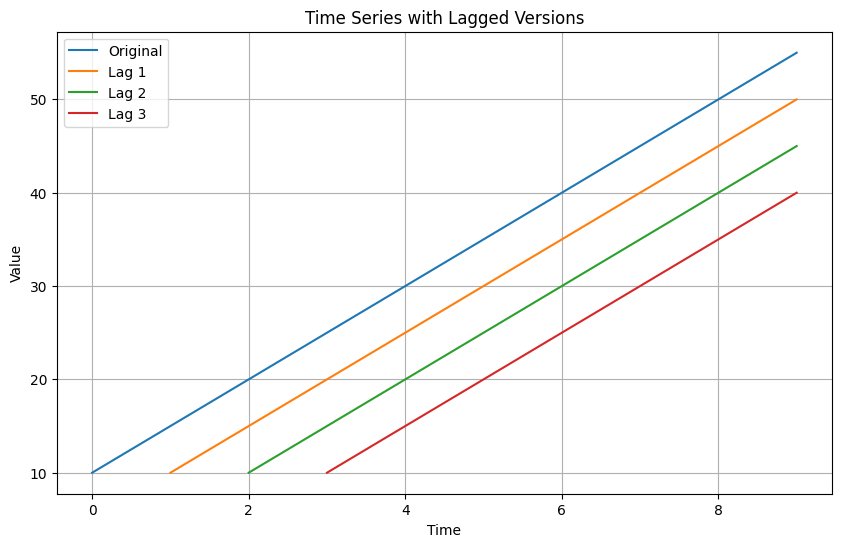

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original')
plt.plot(lag_1, label='Lag 1')
plt.plot(lag_2, label='Lag 2')
plt.plot(lag_3, label='Lag 3')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series with Lagged Versions')
plt.legend()
plt.grid(True)
plt.show()

# Example

In [5]:
def check_stationarity(series):

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")


In [6]:
dateparse = lambda x: datetime.strptime('190'+x, '%Y-%m')

In [7]:
series_2 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)

/tmp/ipython-input-2627788734.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series_2 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)


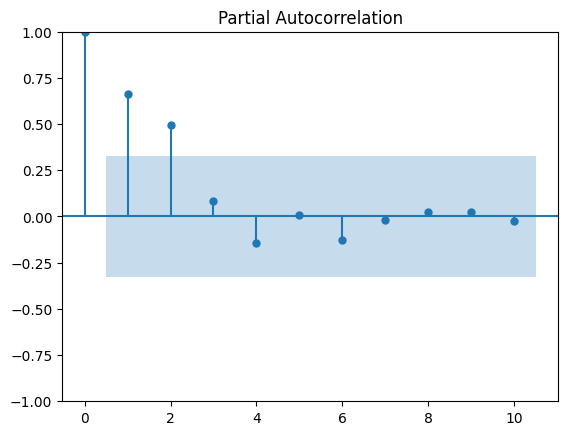

In [8]:
plot_pacf(series_2, lags=10)
plt.show()

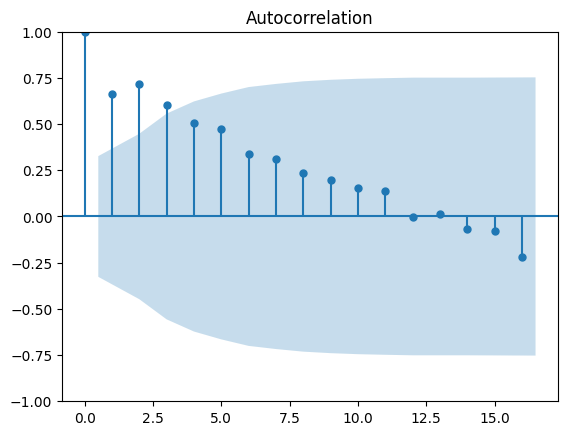

In [9]:
plot_acf(series_2)
plt.show()


In [10]:
import pandas as pd
import numpy as np

# Parameters
np.random.seed(42)
n = 50  # Number of data points
mu = 0  # Mean of the series
theta = 0.7  # MA parameter

# Generate MA(1) time series data
errors = np.random.normal(loc=0, scale=1, size=n)
data = [mu + errors[0]]  # Initial value
for i in range(1, n):
    data.append(mu + theta * errors[i-1] + errors[i])

# Create pandas DataFrame
df = pd.DataFrame({'Time': pd.date_range(start='2024-01-01', periods=n, freq='D'),
                   'Data': data})

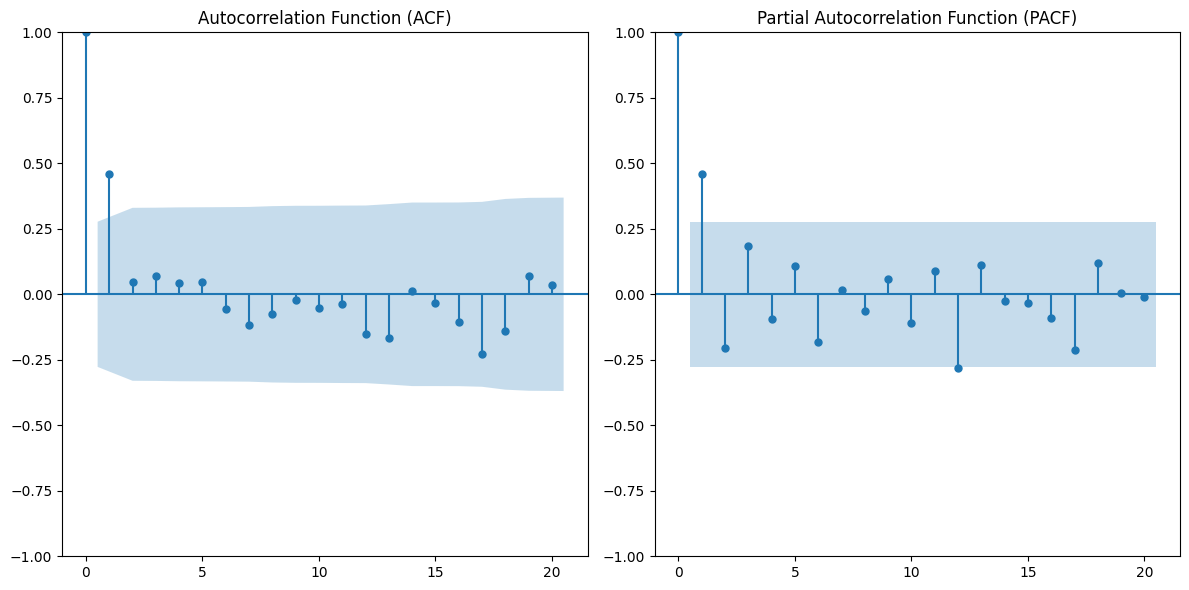

In [11]:
plt.figure(figsize=(12, 6))
plot_acf(df['Data'], lags=20, ax=plt.subplot(1, 2, 1))
plt.title('Autocorrelation Function (ACF)')
plot_pacf(df['Data'], lags=20, ax=plt.subplot(1, 2, 2))
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from pandas import read_csv

In [13]:
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d')

In [14]:
series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0)

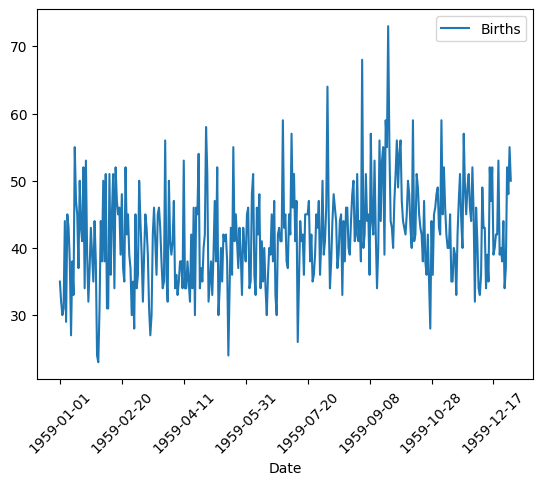

In [15]:
series.plot(legend=True)
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.show()

In [16]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [17]:
result = adfuller(series)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


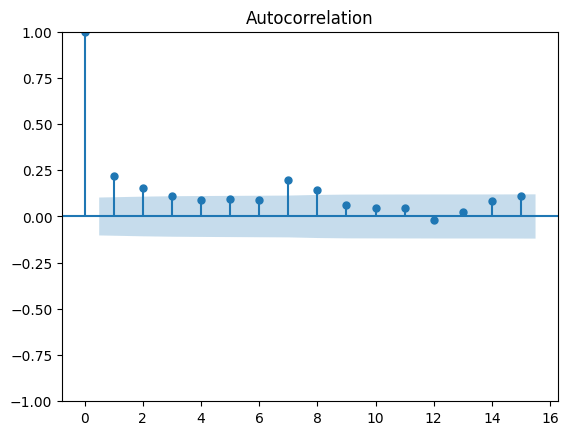

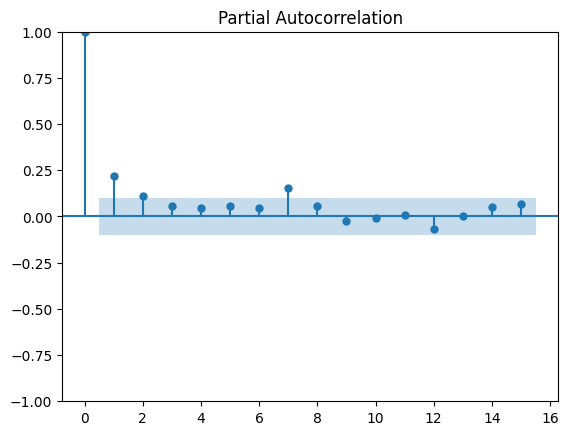

In [18]:
plot_acf(series, lags=15)
plot_pacf(series, lags=15)
plt.show()

# We can check AR(1), AR(2), AR(7)

In [19]:
ar_orders = [1, 2,7]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):

    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [20]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 2479.080627834601
AIC for AR(2): 2476.363657107182
AIC for AR(7): 2472.778262629018


In [21]:
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

BIC for AR(1): 2490.7803198953484
BIC for AR(2): 2491.963246521512
BIC for AR(7): 2507.8773388112604


# If we treat this as a ARMA process

In [22]:
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series, order=(p, 0, q))
    arma_model_fit = arma_model.fit()

    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic

    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

In [23]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')

ARMA(1,1) - AIC: 2468.905798033242, BIC: 2484.5053874475716
ARMA(1,2) - AIC: 2466.724037901049, BIC: 2486.2235246689615
ARMA(2,1) - AIC: 2466.283266457811, BIC: 2485.7827532257234
ARMA(2,2) - AIC: 2467.6978578156804, BIC: 2491.0972419371756


In [24]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [25]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

/tmp/ipython-input-4154342099.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [26]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [27]:
perform_adf_test(series)


ADF Statistic: -7.162321
p-value: 0.000000


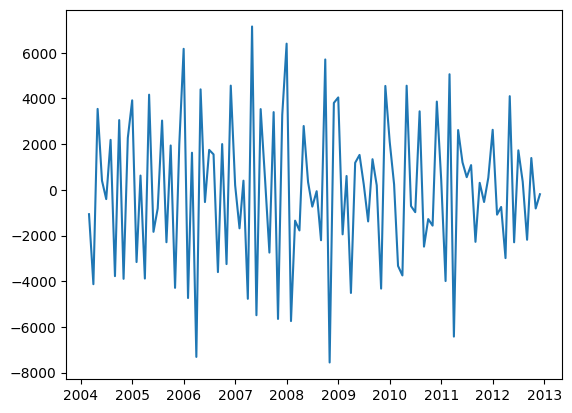

In [28]:
plt.plot(series)


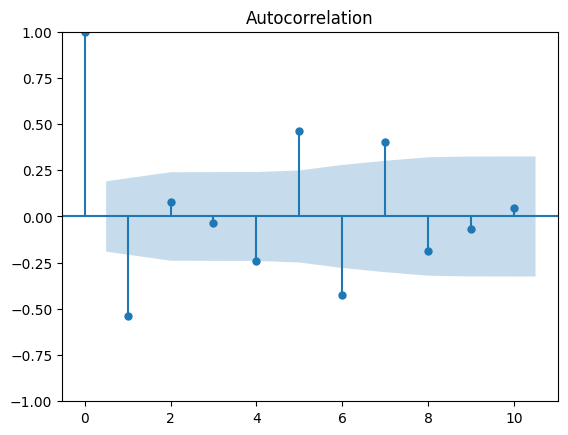

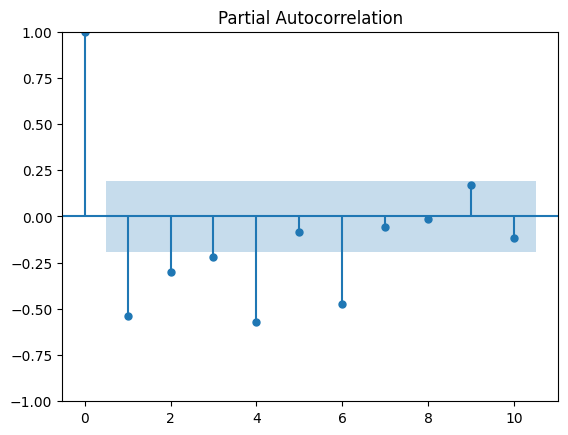

In [29]:
plot_acf(series, lags=10)
plot_pacf(series, lags=10)

plt.show()


In [30]:
ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):

    #create AR(p) model
    ar_model = ARIMA(series, order=(ar_order,0,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit


In [31]:
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))


AIC for AR(1): 1980.860621744531
AIC for AR(4): 1927.609985266023
AIC for AR(6): 1899.6497440836226
AIC for AR(10): 1902.3765450081733


In [32]:
#BIC comparison
for ar_order in ar_orders:
    print('BIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))


BIC for AR(1): 1988.8509390268673
BIC for AR(4): 1943.5906198306952
BIC for AR(6): 1920.9572568365193
BIC for AR(10): 1934.337814137518


In [33]:
!pip uninstall -y numpy pmdarima
!pip install numpy==1.26.4
!pip install pmdarima


Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pmdarima 2.0.4
Uninstalling pmdarima-2.0.4:
  Successfully uninstalled pmdarima-2.0.4
  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>

  Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (7.8 kB)
Using cached pmdarima-2.0.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl (2.3 MB)


In [34]:
from pandas import read_csv
from datetime import datetime
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings
import time

In [35]:
df_2=pd.read_csv('catfish.csv')

In [36]:
df_2['Date'] = pd.to_datetime(df_2['Date'])


In [37]:
df_2.set_index('Date', inplace=True)

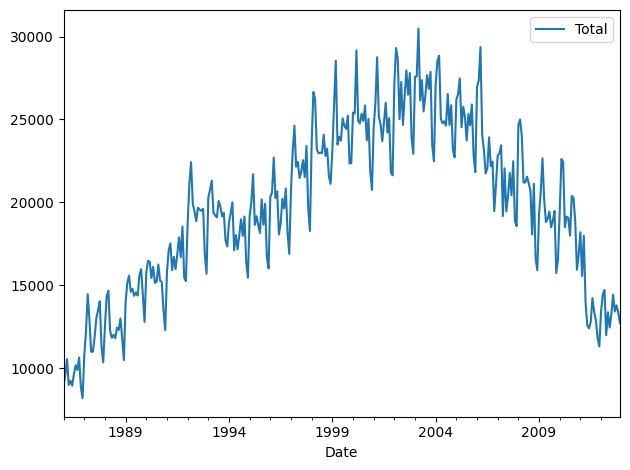

In [38]:
df_2['Total'].plot(legend=True)
plt.tight_layout()
plt.show()


In [39]:
df_2

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239
...,...
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795


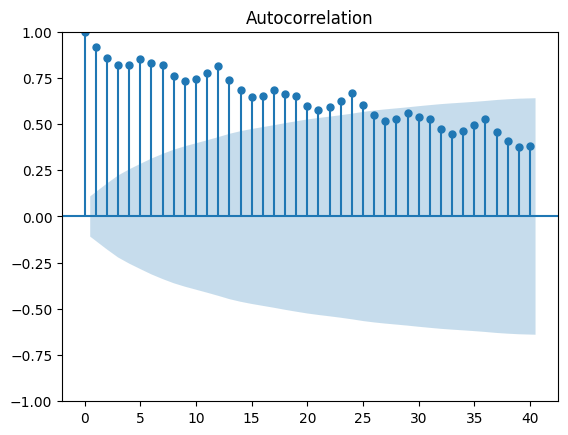

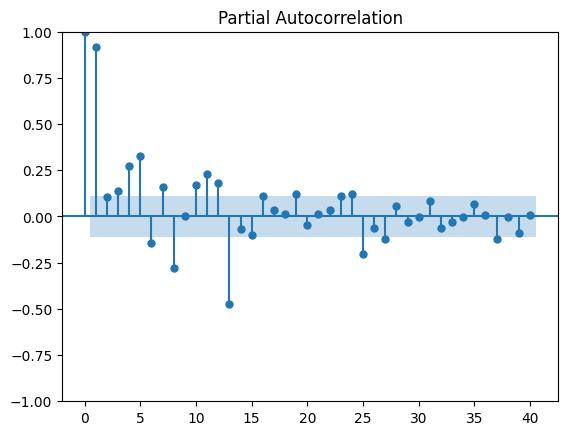

In [40]:
plot_acf(df_2['Total'],lags=40)
plot_pacf(df_2['Total'], lags=40)
plt.show()

In [41]:
# train_size = int(len(df_2) * 0.8)  # 80% of data for training
# train_data_2, test_data_2 = df_2[:train_size], df_2[train_size:]

In [42]:
train_size = int(len(df_2) * 0.80)
train_data_2, test_data_2 = df_2[0:train_size], df_2[train_size:]


In [43]:
start_2=len(train_data_2)
end_2=len(train_data_2)+ len(test_data_2)-1

In [44]:
model_4=ARIMA(train_data_2,order=(1,0,1))
model_4=model_4.fit()
model_4.summary()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  259
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2318.444
Date:                Mon, 15 Sep 2025   AIC                           4644.888
Time:                        11:04:07   BIC                           4659.115
Sample:                    01-01-1986   HQIC                          4650.608
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.016e+04   5432.597      3.711      0.000    9513.102    3.08e+04
ar.L1          0.9963      0.006    177.199      0.000       0.985       1.007
ma.L1         -0.7030      0.046    -15.245      0.000      -0.793      -0.613
sigma2      3.445e+06     20.054   1.72e+05      0.000    3.45e+06    3.45e+06
===================================================================================
Ljung-Box (L1) (Q):                  20.16   Jarque-Bera (JB):                 4.52
Prob(Q):                              0.00   Prob(JB):                         0.10
Heteroskedasticity (H):               1.80   Skew:                             0.32
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.01e+24. Standard errors may be unstable.
"""

In [45]:
pred_4=model_4.predict(start=start_2,end=end_2,type='levels')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [46]:
pred_4.index=df_2.index[start_2:end_2+1]

<Axes: xlabel='Date'>

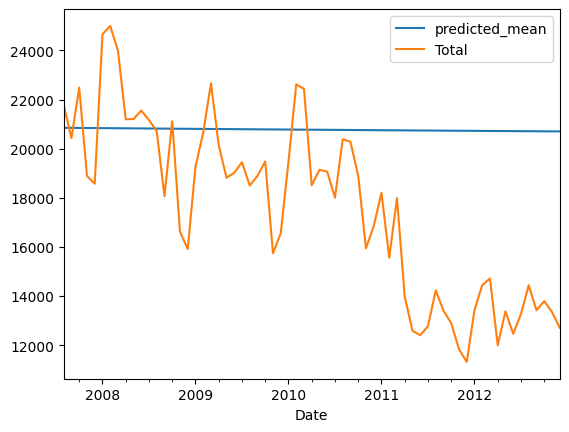

In [47]:
pred_4.plot(legend=True)
test_data_2['Total'].plot(legend=True)

In [48]:
start_2

259

In [49]:
end_2

323

In [50]:
len(pred_4)

65

In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
mae=mean_absolute_error(pred_4,test_data_2['Total'])
print(mae)

3844.5009324866705


# Grid Search

In [53]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, max_diff_order=2, alpha=0.05):
    """
    Check stationarity of a time series using the Augmented Dickey-Fuller (ADF) test.
    If the series is not stationary, apply differencing recursively until stationarity is achieved.

    Parameters:
    - series: pandas Series, the time series data
    - max_diff_order: int, maximum order of differencing to be applied (default: 2)
    - alpha: float, significance level for ADF test (default: 0.05)

    Returns:
    - stationary_series: pandas Series, the stationary time series
    """
    # Perform ADF test
    adf_result = adfuller(series)
    p_value = adf_result[1]

    # If the series is already stationary, return the original series
    if p_value < alpha:
        print("Original series is stationary (p-value: {:.4f})".format(p_value))
        return series



    # If the series is not stationary, apply differencing
    print("Original series is not stationary (p-value: {:.4f}), applying differencing...".format(p_value))
    for diff_order in range(1, max_diff_order + 1):
        differenced_series = series.diff(diff_order).dropna()
        adf_result_diff = adfuller(differenced_series)
        p_value_diff = adf_result_diff[1]

        # Check stationarity after differencing
        if p_value_diff < alpha:
            print("Series after {} order differencing is stationary (p-value: {:.4f})".format(diff_order, p_value_diff))
            return differenced_series

    # If maximum differencing orders reached and still not stationary, return None
    print("Maximum differencing orders reached. Unable to achieve stationarity.")
    return None

# Example usage:
# Assuming 'time_series' is your pandas Series containing the time series data
# stationary_series = check_stationarity(time_series)


In [54]:
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)

In [55]:
stat=check_stationarity(df_2['Total'])

Original series is not stationary (p-value: 0.4887), applying differencing...
Series after 1 order differencing is stationary (p-value: 0.0004)


In [56]:
def evaluate_arima_model(X, arima_order):
 # prepare training dataset
 train_size = int(len(X) * 0.80)
 train, test = X[0:train_size], X[train_size:]
 history = [x for x in train]
 predictions = list()
 for t in range(len(test)):
     model = ARIMA(history, order=arima_order)
     model_fit = model.fit()
     yhat = model_fit.forecast()[0]
     predictions.append(yhat)
     history.append(test[t])
 # # calculate out of sample error
 rmse = sqrt(mean_squared_error(test, predictions))
 return rmse,predictions



In [57]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse,predictions = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
    return predictions



In [58]:
%%time
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
predictions_f=evaluate_models(df_2['Total'], p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=4291.542
ARIMA(0, 0, 1) RMSE=2752.009
ARIMA(0, 0, 2) RMSE=2667.481
ARIMA(0, 1, 0) RMSE=1981.805
ARIMA(0, 1, 1) RMSE=1957.826
ARIMA(0, 1, 2) RMSE=1842.939
ARIMA(0, 2, 0) RMSE=2997.527
ARIMA(0, 2, 1) RMSE=1989.022
ARIMA(0, 2, 2) RMSE=2033.402
ARIMA(1, 0, 0) RMSE=1950.944
ARIMA(1, 0, 1) RMSE=1967.729
ARIMA(1, 0, 2) RMSE=1853.136
ARIMA(1, 1, 0) RMSE=1964.315
ARIMA(1, 1, 1) RMSE=1860.605
ARIMA(1, 1, 2) RMSE=1845.211
ARIMA(1, 2, 0) RMSE=2672.917
ARIMA(1, 2, 1) RMSE=1972.647
ARIMA(1, 2, 2) RMSE=1971.875
ARIMA(2, 0, 0) RMSE=1944.413
ARIMA(2, 0, 1) RMSE=1869.282
ARIMA(2, 0, 2) RMSE=1847.488
ARIMA(2, 1, 0) RMSE=1912.153
ARIMA(2, 1, 1) RMSE=1840.219
ARIMA(2, 1, 2) RMSE=1933.168
ARIMA(2, 2, 0) RMSE=2499.561
ARIMA(2, 2, 1) RMSE=1920.838
ARIMA(2, 2, 2) RMSE=1903.641
Best ARIMA(2, 1, 1) RMSE=1840.219
CPU times: user 5min 56s, sys: 457 ms, total: 5min 57s
Wall time: 3min 24s


# AutoARIMA

In [59]:
stepwise_fit_2=auto_arima(train_data_2,start_p=0, start_q=0,d=1,
                           max_p=40, max_q=40,information_criterion='bic',trace=True,suppress_warnings=True,stepwise=True,seasonal=False)
stepwise_fit_2.summary()

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=4649.232, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=4649.084, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=4638.067, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=4643.814, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=4607.085, Time=0.15 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : BIC=4602.170, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : BIC=4649.248, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : BIC=4583.298, Time=0.90 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : BIC=4612.777, Time=0.13 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : BIC=4559.523, Time=0.35 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : BIC=4568.196, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : BIC=4564.788, Time=0.26 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : BIC=4542.279, Time=0.44 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(4, 1, 3)   Log Likelihood               -2231.495
Date:                Mon, 15 Sep 2025   AIC                           4478.991
Time:                        11:07:43   BIC                           4507.414
Sample:                    01-01-1986   HQIC                          4490.420
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0314      0.083    -12.427      0.000      -1.194      -0.869
ar.L2         -0.3177      0.146     -2.172      0.030      -0.604      -0.031
ar.L3         -0.2221      0.135     -1.649      0.099      -0.486       0.042
ar.L4         -0.5288      0.071     -7.495      0.000      -0.667      -0.391
ma.L1          0.9692      0.091     10.633      0.000       0.791       1.148
ma.L2         -0.2428      0.151     -1.608      0.108      -0.539       0.053
ma.L3         -0.6656      0.096     -6.967      0.000      -0.853      -0.478
sigma2      2.131e+06   1.17e-08   1.82e+14      0.000    2.13e+06    2.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.39   Prob(JB):                         0.17
Heteroskedasticity (H):               1.42   Skew:                             0.27
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.22e+29. Standard errors may be unstable.
"""

In [60]:
model_3=ARIMA(train_data_2,order=(4,1,3))
model_3=model_3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  259
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -2231.495
Date:                Mon, 15 Sep 2025   AIC                           4478.991
Time:                        11:07:44   BIC                           4507.414
Sample:                    01-01-1986   HQIC                          4490.420
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0314      0.083    -12.427      0.000      -1.194      -0.869
ar.L2         -0.3177      0.146     -2.172      0.030      -0.604      -0.031
ar.L3         -0.2221      0.135     -1.649      0.099      -0.486       0.042
ar.L4         -0.5288      0.071     -7.495      0.000      -0.667      -0.391
ma.L1          0.9692      0.091     10.633      0.000       0.791       1.148
ma.L2         -0.2428      0.151     -1.608      0.108      -0.539       0.053
ma.L3         -0.6656      0.096     -6.967      0.000      -0.853      -0.478
sigma2      2.131e+06   1.17e-08   1.82e+14      0.000    2.13e+06    2.13e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.73   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.39   Prob(JB):                         0.17
Heteroskedasticity (H):               1.42   Skew:                             0.27
Prob(H) (two-sided):                  0.11   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.22e+29. Standard errors may be unstable.
"""

In [61]:
pred_3=model_3.predict(start=start_2,end=end_2,type='levels')

In [62]:
pred_3

,predicted_mean
2007-08-01,22583.714610
2007-09-01,20998.738922
2007-10-01,22474.260926
2007-11-01,20475.740344
2007-12-01,21254.047157
...,...
2012-08-01,21961.606291
2012-09-01,20463.250518
2012-10-01,22195.474620
2012-11-01,20690.875321


In [63]:
pred_3.index=df_2.index[start_2:end_2+1]

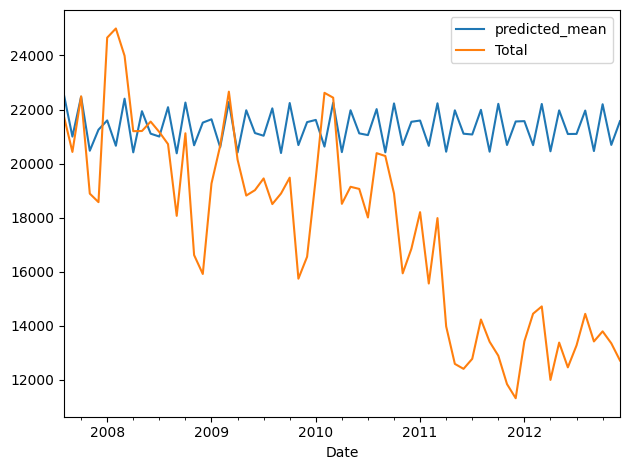

In [64]:
pred_3.plot(legend=True)
test_data_2['Total'].plot(legend=True)
plt.tight_layout()

In [65]:
from sklearn.metrics import mean_absolute_error


In [66]:
rmse=sqrt(mean_squared_error(pred_3,test_data_2['Total']))
print(rmse)

5182.459131057669


In [67]:
test_data_2['Total'].mean()

17581.33846153846

In [68]:
model_future=ARIMA(df_2['Total'],order=(4,1,3))
model_future=model_future.fit()

In [69]:
df_2.tail()

,Total
Date,
2012-08-01,14442
2012-09-01,13422
2012-10-01,13795
2012-11-01,13352
2012-12-01,12716


In [70]:
index_future=pd.date_range(start='2012-12-01',end='2013-08-01',freq='M')

In [71]:
index_future

DatetimeIndex(['2012-12-31', '2013-01-31', '2013-02-28', '2013-03-31',
               '2013-04-30', '2013-05-31', '2013-06-30', '2013-07-31'],
              dtype='datetime64[ns]', freq='ME')

In [72]:
pred_future=model_future.predict(start=len(df_2),end=len(df_2)+7,type='level')

In [73]:
pred_future

,predicted_mean
2013-01-01,12890.686883
2013-02-01,12496.383686
2013-03-01,14025.196727
2013-04-01,12807.877930
2013-05-01,13561.920658
2013-06-01,13067.019951
2013-07-01,12820.840809
2013-08-01,13709.794332


In [74]:
pred_future.index=index_future

In [75]:
pred_future

,predicted_mean
2012-12-31,12890.686883
2013-01-31,12496.383686
2013-02-28,14025.196727
2013-03-31,12807.877930
2013-04-30,13561.920658
2013-05-31,13067.019951
2013-06-30,12820.840809
2013-07-31,13709.794332


In [76]:
len(df_2)

324

<Axes: >

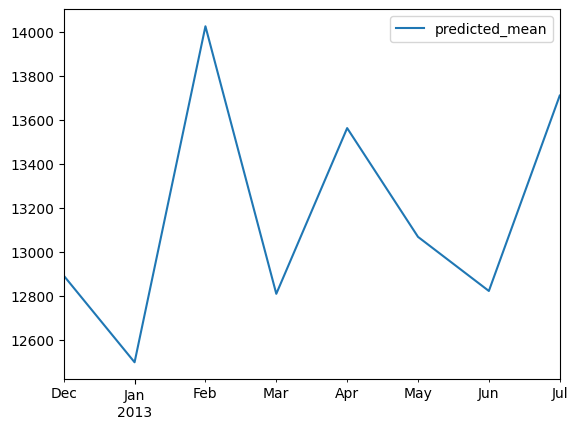

In [77]:
pred_future.plot(legend=True)

In [78]:
df_final=pd.DataFrame({'Date':pred_future.index, 'Total':pred_future.values})

In [79]:
df_final['Date'] = pd.to_datetime(df_final['Date'])

In [80]:
df_final.set_index('Date', inplace=True)

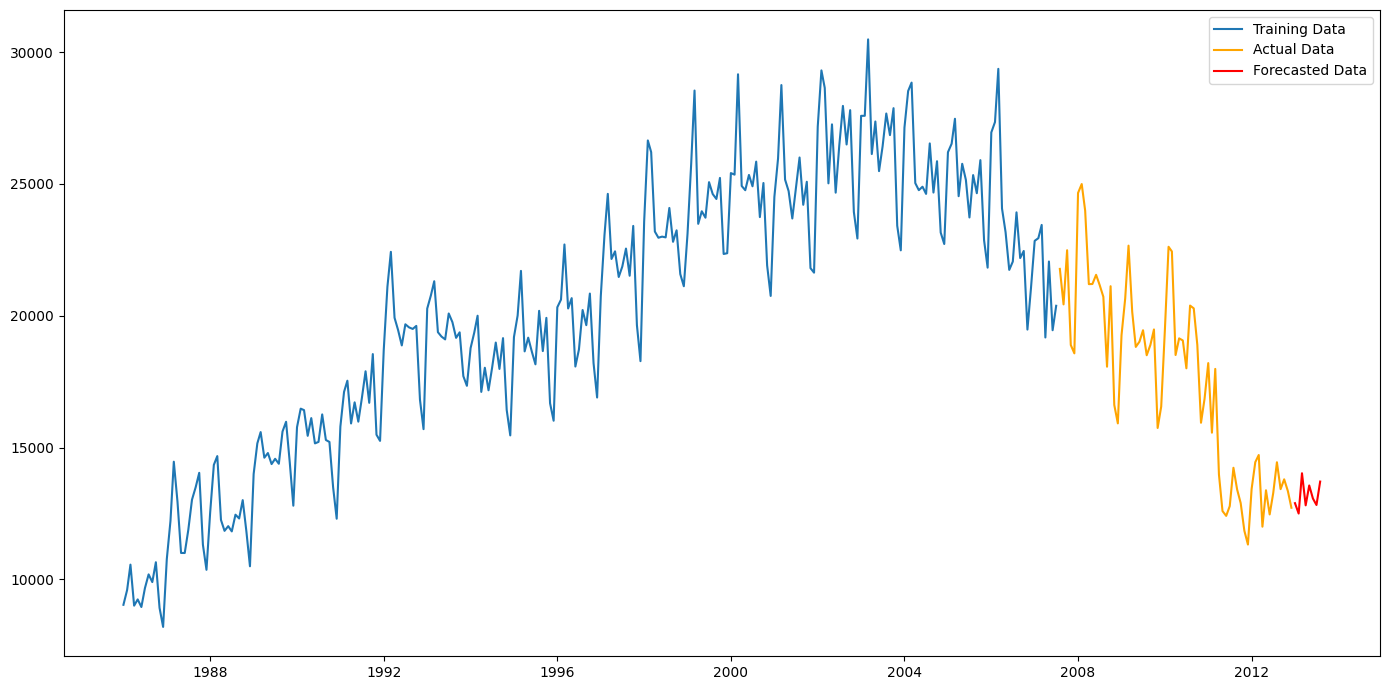

In [81]:
plt.figure(figsize=(14,7))
plt.plot(train_data_2.index,train_data_2['Total'],label='Training Data')
plt.plot(test_data_2.index,test_data_2['Total'], label='Actual Data', color='orange')
plt.plot(df_final.index ,df_final['Total'],label='Forecasted Data', color='red')

plt.legend()
plt.tight_layout()
plt.show()


# Difference the series then apply auto_arima

In [82]:
cat_df=difference(df_2['Total'])

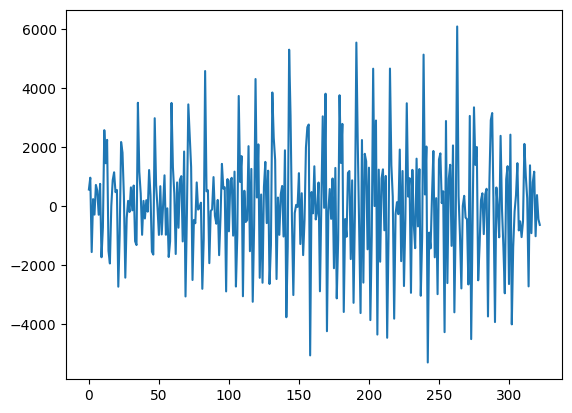

In [83]:
plt.plot(cat_df)

In [84]:
train_size = int(len(df_2) * 0.80)
train_data_3, test_data_3 = cat_df[0:train_size], cat_df[train_size:]


In [85]:
stepwise_fit_3=auto_arima(train_data_3,start_p=0, start_q=0,d=0,
                           max_p=40, max_q=40,information_criterion='aic',trace=True,suppress_warnings=True,stepwise=True,seasonal=False)
stepwise_fit_3.summary()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4657.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4653.615, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4637.895, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4606.420, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4598.007, Time=0.06 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4649.109, Time=0.03 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=4578.197, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=4610.342, Time=0.03 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=4544.511, Time=0.11 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=4558.191, Time=0.04 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=4546.120, Time=0.16 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.25 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=4558.342, Time=0.07 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=4

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  259
Model:              SARIMAX(12, 0, 1)   Log Likelihood               -2154.805
Date:                Mon, 15 Sep 2025   AIC                           4337.610
Time:                        11:08:00   BIC                           4387.406
Sample:                             0   HQIC                          4357.631
                                - 259                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0683      0.062      1.102      0.271      -0.053       0.190
ar.L2         -0.1018      0.057     -1.772      0.076      -0.214       0.011
ar.L3         -0.1159      0.062     -1.862      0.063      -0.238       0.006
ar.L4         -0.0323      0.058     -0.555      0.579      -0.146       0.082
ar.L5          0.0290      0.058      0.499      0.618      -0.085       0.143
ar.L6         -0.1215      0.057     -2.123      0.034      -0.234      -0.009
ar.L7          0.0672      0.067      1.005      0.315      -0.064       0.198
ar.L8         -0.0882      0.059     -1.500      0.134      -0.203       0.027
ar.L9         -0.0625      0.056     -1.112      0.266      -0.173       0.048
ar.L10        -0.0045      0.055     -0.081      0.935      -0.112       0.103
ar.L11         0.0053      0.057      0.092      0.927      -0.107       0.118
ar.L12         0.6784      0.050     13.684      0.000       0.581       0.776
ma.L1         -0.4836      0.084     -5.743      0.000      -0.649      -0.319
sigma2      1.029e+06   1.04e+05      9.937      0.000    8.26e+05    1.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.77
Prob(Q):                              0.81   Prob(JB):                         0.41
Heteroskedasticity (H):               1.66   Skew:                             0.20
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [86]:
model_4=ARIMA(train_data_2,order=(12,1,1))
model_4=model_4.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                  259
Model:                ARIMA(12, 1, 1)   Log Likelihood               -2148.720
Date:                Mon, 15 Sep 2025   AIC                           4325.441
Time:                        11:08:01   BIC                           4375.182
Sample:                    01-01-1986   HQIC                          4345.442
                         - 07-01-2007                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0989      0.058      1.697      0.090      -0.015       0.213
ar.L2         -0.0783      0.051     -1.538      0.124      -0.178       0.021
ar.L3         -0.0946      0.056     -1.696      0.090      -0.204       0.015
ar.L4         -0.0034      0.055     -0.061      0.951      -0.111       0.104
ar.L5          0.0493      0.052      0.950      0.342      -0.052       0.151
ar.L6         -0.1073      0.047     -2.261      0.024      -0.200      -0.014
ar.L7          0.0884      0.058      1.525      0.127      -0.025       0.202
ar.L8         -0.0739      0.054     -1.359      0.174      -0.180       0.033
ar.L9         -0.0404      0.050     -0.816      0.415      -0.137       0.057
ar.L10         0.0129      0.051      0.253      0.800      -0.087       0.113
ar.L11         0.0191      0.053      0.359      0.720      -0.085       0.124
ar.L12         0.6726      0.046     14.488      0.000       0.582       0.764
ma.L1         -0.5203      0.079     -6.595      0.000      -0.675      -0.366
sigma2      1.032e+06   1.04e+05      9.963      0.000    8.29e+05    1.23e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 1.98
Prob(Q):                              0.85   Prob(JB):                         0.37
Heteroskedasticity (H):               1.57   Skew:                             0.21
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
pred_4=model_4.predict(start=start_2,end=end_2,type='levels')

In [88]:
rmse=sqrt(mean_squared_error(pred_4,test_data_2['Total']))
print(rmse)

3061.4209907593654


In [89]:
pred_4

,predicted_mean
2007-08-01,21587.944493
2007-09-01,20221.382687
2007-10-01,20621.587603
2007-11-01,17841.922752
2007-12-01,19634.275952
...,...
2012-08-01,18401.098633
2012-09-01,17767.420594
2012-10-01,17874.371953
2012-11-01,16831.329089


In [90]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
from datetime import timedelta

In [91]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')


In [92]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])


In [94]:
series = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)

In [95]:
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]

In [96]:
series_1 = series.diff().dropna()

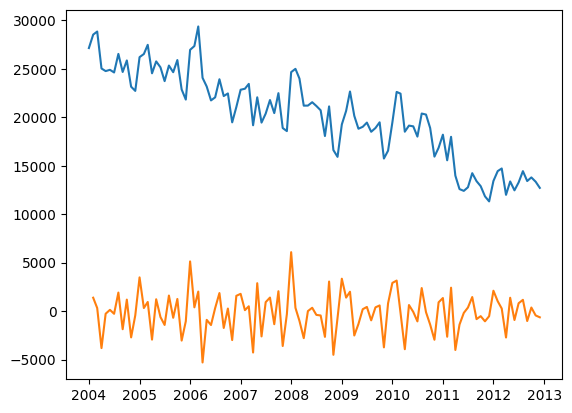

In [97]:
plt.plot(series)
plt.plot(series_1)

In [98]:
series_2 = series_1.diff().dropna()

In [99]:
perform_adf_test(series_2)

ADF Statistic: -7.162321
p-value: 0.000000


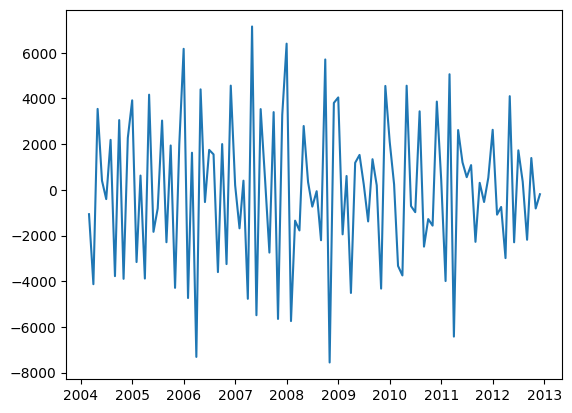

In [100]:
plt.plot(series_2)

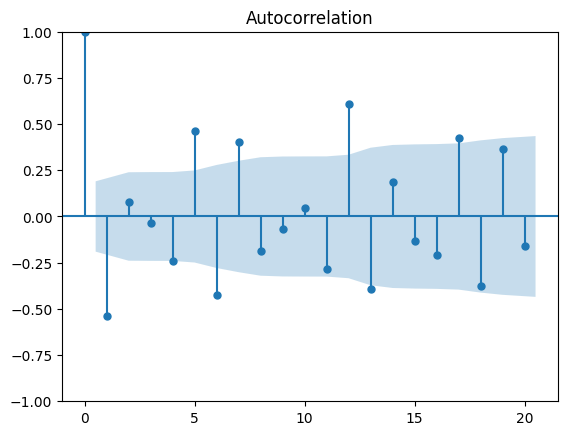

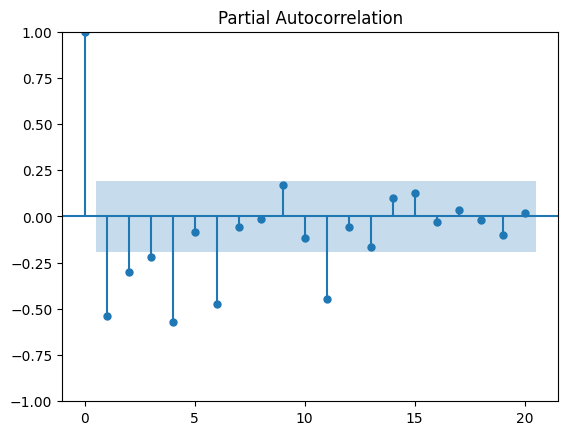

In [101]:
plot_acf(series_2, lags=20)
plot_pacf(series_2, lags=20)
plt.show()

In [102]:
ar_orders = [1, 2, 3]
ma_orders = [5, 6, 7]
fitted_model_dict = {}

for ar_order in ar_orders:
    for ma_order in ma_orders:
        # Create ARMA(p,q) model
        arma_model = ARIMA(series_2, order=(ar_order, 0, ma_order))
        arma_model_fit = arma_model.fit()
        fitted_model_dict[(ar_order, ma_order)] = arma_model_fit

In [103]:
from statsmodels.tsa.arima.model import ARIMA
from itertools import product

p_values = range(1, 3)
q_values = range(1, 3)

fitted_model_dict = {}

for p, q in product(p_values, q_values):
    # Create ARMA(p,q) model
    arma_model = ARIMA(series_2, order=(p, 0, q))
    arma_model_fit = arma_model.fit()

    # Store AIC and BIC scores
    aic_score = arma_model_fit.aic
    bic_score = arma_model_fit.bic

    fitted_model_dict[(p, q)] = {'AIC': aic_score, 'BIC': bic_score}

# Print AIC and BIC scores for each combination


In [104]:
for (p, q), scores in fitted_model_dict.items():
    print(f'ARMA({p},{q}) - AIC: {scores["AIC"]}, BIC: {scores["BIC"]}')


ARMA(1,1) - AIC: 1925.101919524895, BIC: 1935.7556759013432
ARMA(1,2) - AIC: 1910.8157063931574, BIC: 1924.1329018637177
ARMA(2,1) - AIC: 1924.15595736913, BIC: 1937.4731528396903
ARMA(2,2) - AIC: 1921.777662911171, BIC: 1937.7582974758434


In [105]:
train_end = datetime(2011,12,1)
test_end = datetime(2012,12,1)

train_data = series_2[:train_end]
test_data = series_2[train_end + timedelta(days=1):test_end]

In [106]:
model = ARIMA(train_data, order=(2,1,2))

In [107]:
model_fit = model.fit()

In [108]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   94
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -864.804
Date:                Mon, 15 Sep 2025   AIC                           1739.608
Time:                        11:08:50   BIC                           1752.271
Sample:                    03-01-2004   HQIC                          1744.721
                         - 12-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3752      0.101    -13.656      0.000      -1.573      -1.178
ar.L2         -0.6232      0.095     -6.561      0.000      -0.809      -0.437
ma.L1         -0.1632      0.159     -1.025      0.3

In [109]:
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [110]:
pred_end_date

Timestamp('2012-12-01 00:00:00')

In [111]:
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

In [112]:
predictions

,predicted_mean
2012-01-01,-438.581944
2012-02-01,205.147882
2012-03-01,-77.747048
2012-04-01,-89.873018
2012-05-01,103.097069
2012-06-01,-154.716525
2012-07-01,79.570600
2012-08-01,-81.953986
2012-09-01,-5.830377
2012-10-01,-9.855730


Text(0, 0.5, 'Sales')

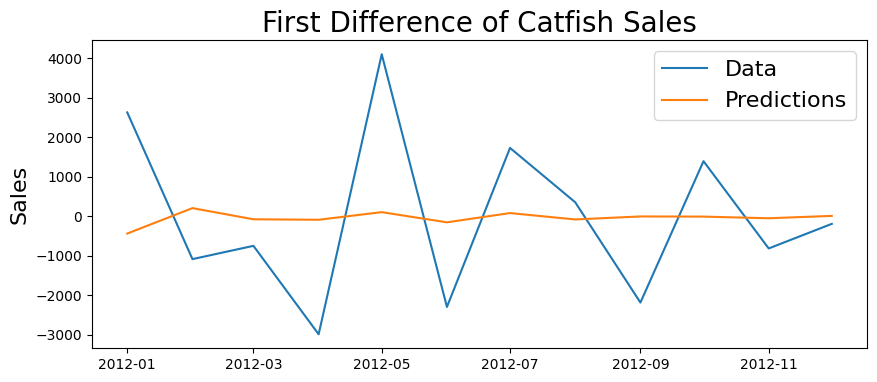

In [113]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)


In [114]:
def invert_diff(last_actual, differences):
    inverted_values = []
    last_observation = last_actual
    for diff in differences:
        inverted_value = last_observation + diff
        inverted_values.append(inverted_value)
        last_observation = inverted_value
    return inverted_values


In [115]:
actual_values = pd.Series([100, 105, 110, 115, 120])

# Sample differenced data (assuming first order differencing)
differenced_data = pd.Series([5, 5, 5, 5])

# Sample model forecast (assuming one-step-ahead forecast)


In [116]:
actual_values = pd.Series([100, 105, 110, 115, 120])
actual_values.iloc[-1]

120

In [117]:
invert_diff(actual_values.iloc[-1],differenced_data)

[125, 130, 135, 140]

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from pandas import Series
from pmdarima import auto_arima

In [120]:
series = pd.read_csv('city_day.csv')
series_delhi = series.loc[series['City'] == 'Delhi']
ts_delhi = series_delhi[['Date','AQI']]
#converting 'Date' column to type 'datetime' so that indexing can happen later
ts_delhi['Date'] = pd.to_datetime(ts_delhi['Date'])

In [121]:
ts_delhi.isnull().sum()
ts_delhi = ts_delhi.dropna()
ts_delhi.isnull().sum()


,0
Date,0
AQI,0


In [122]:
ts_delhi = ts_delhi.set_index('Date')


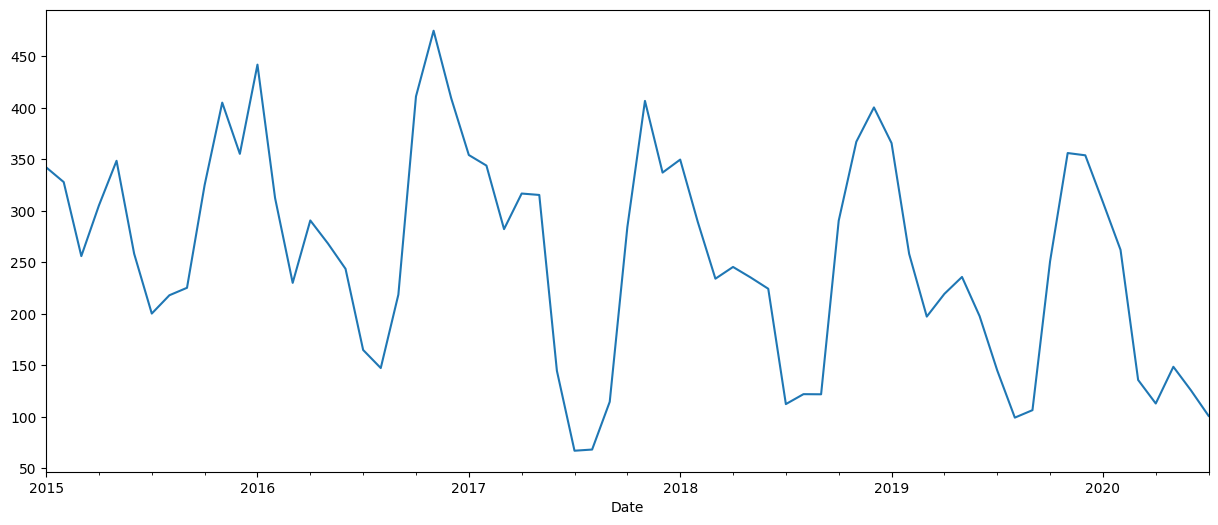

In [123]:
ts_month_avg = ts_delhi['AQI'].resample('MS').mean()
ts_month_avg.plot(figsize = (15, 6))
plt.show()

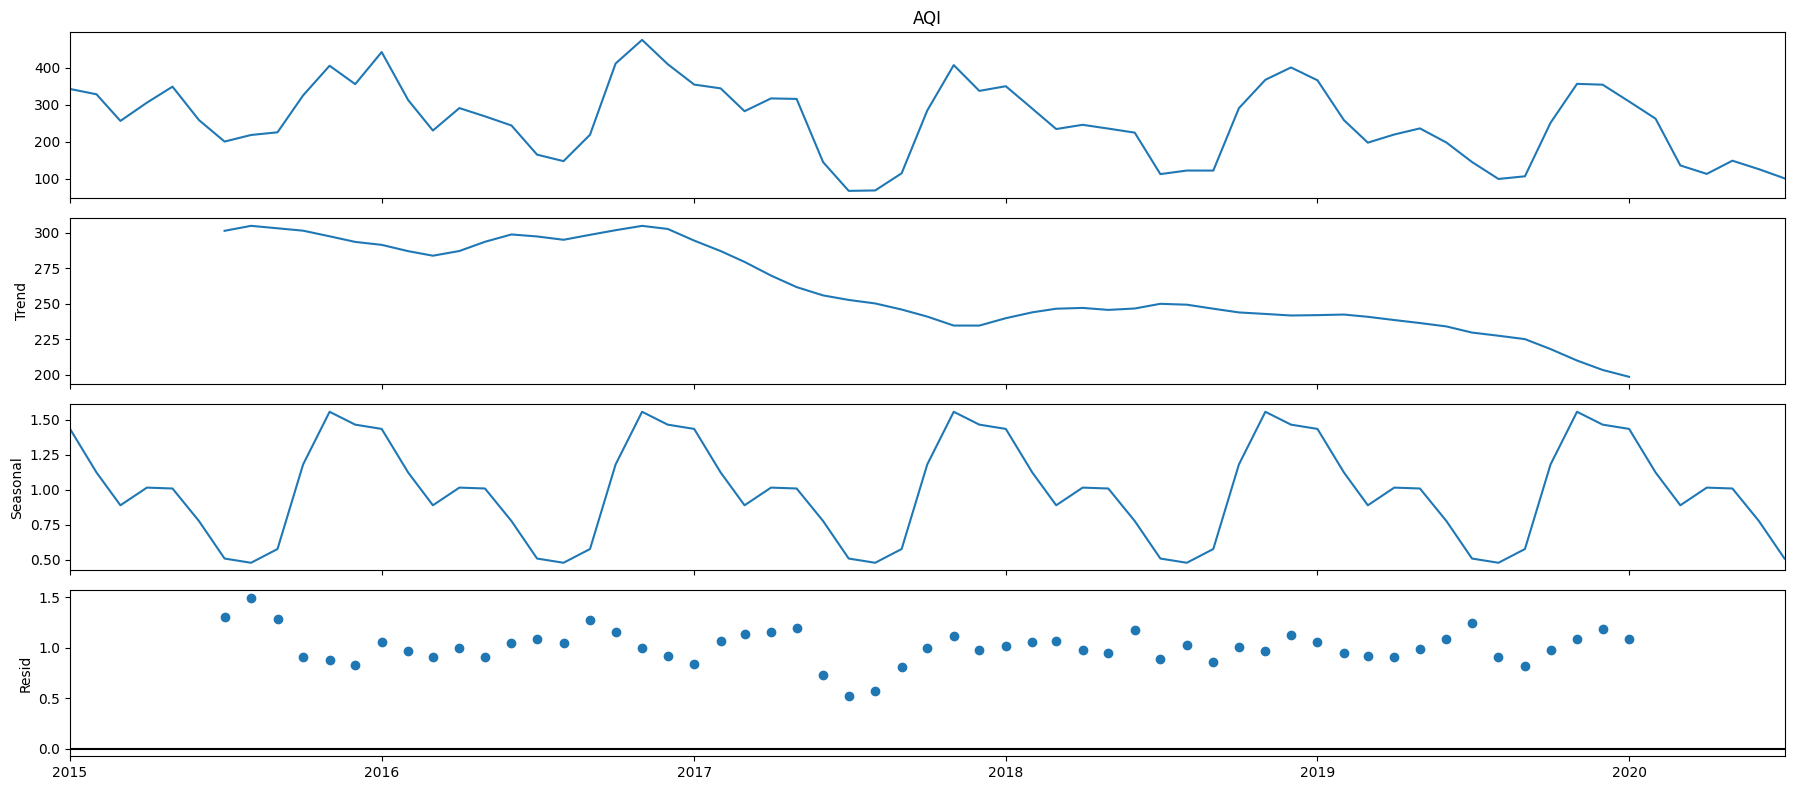

In [124]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ts_month_avg, model='multiplicative')
fig = decomposition.plot()
plt.show()

In [125]:
adf_test = adfuller(ts_month_avg)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: 0.229024
Critical Values @ 0.05: -2.92
p-value: 0.973843


In [126]:
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)

In [127]:
ts_t_adj=difference(ts_month_avg)

In [128]:
ts_t_adj=ts_t_adj.dropna()

<Axes: >

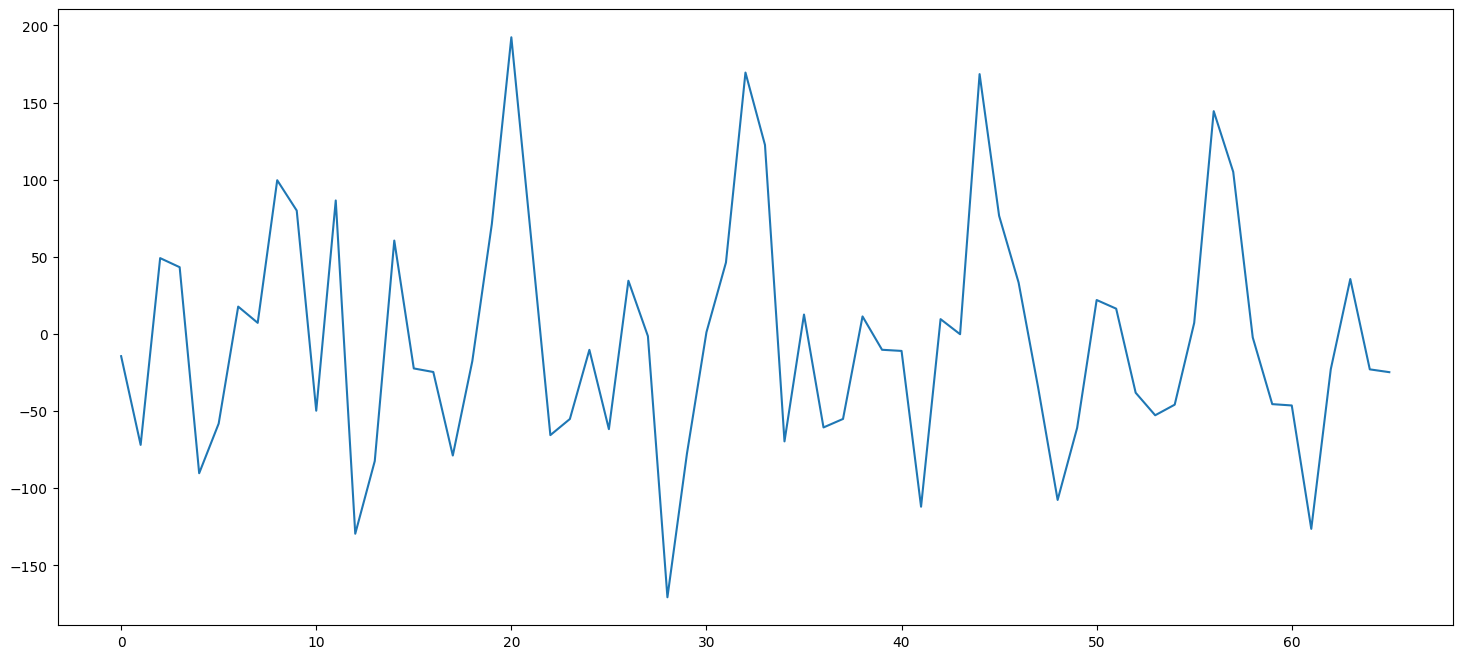

In [129]:
ts_t_adj.plot()

In [130]:
adf_test = adfuller(ts_t_adj)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -6.795995
Critical Values @ 0.05: -2.92
p-value: 0.000000


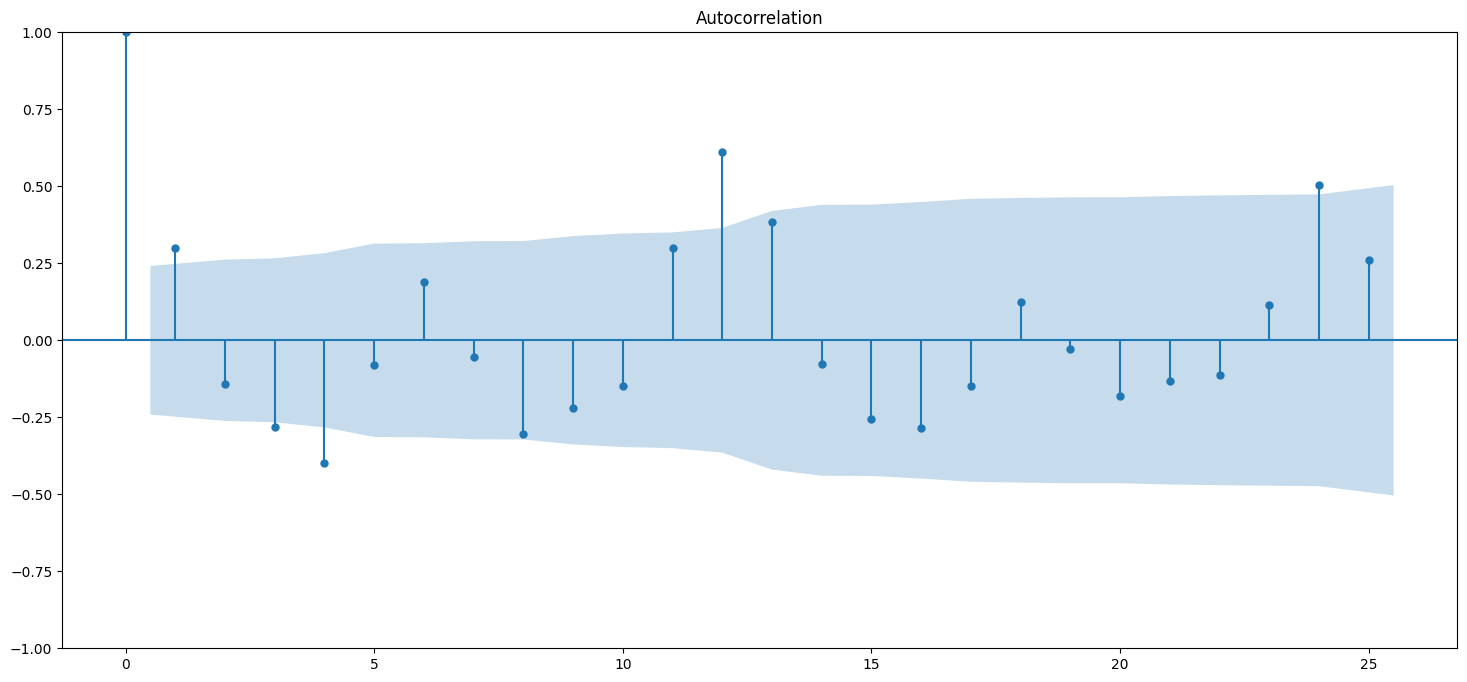

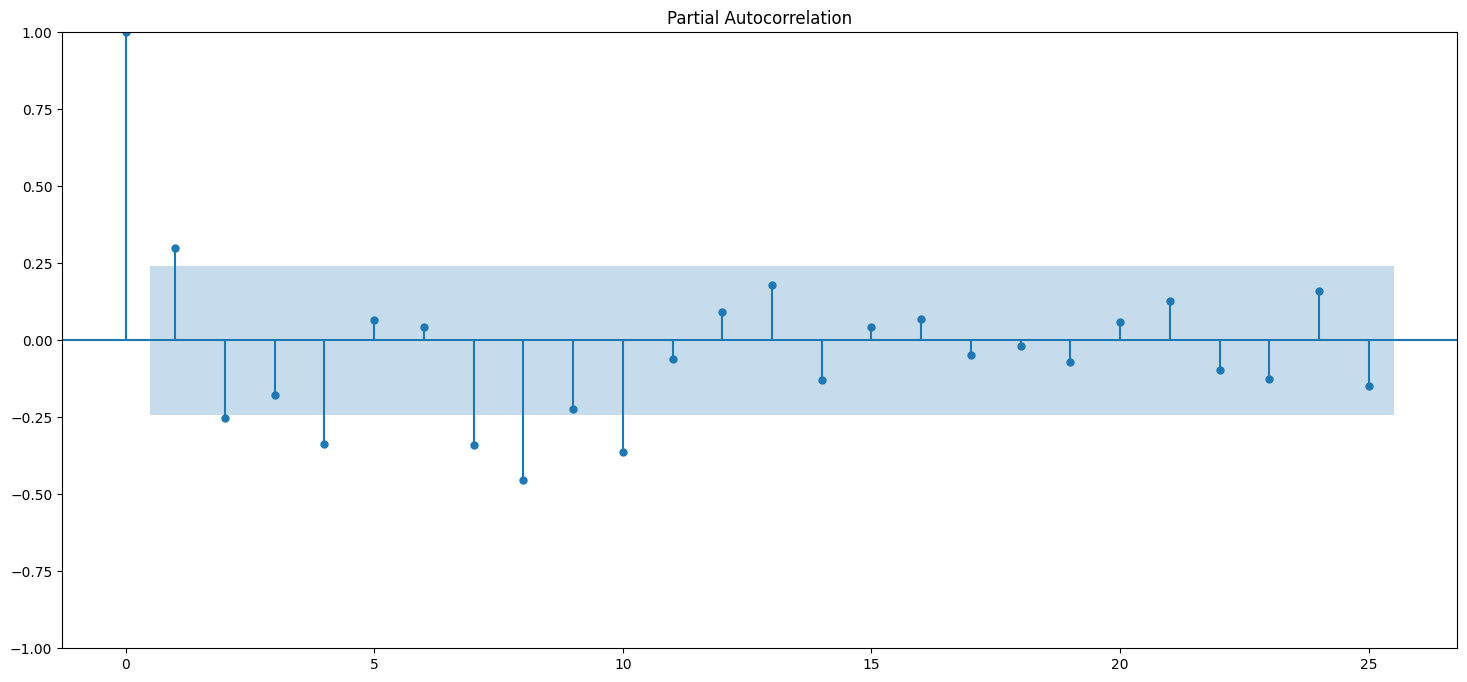

In [131]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_t_adj,lags=25)
plot_pacf(ts_t_adj,lags=25)
plt.show()

In [132]:
train = ts_month_avg[0:54]
test = ts_month_avg[54:]
print('Train Timeseries Range => ', train.index.min(), ' - ' , train.index.max())
print('Test Timeseries Range => ', test.index.min(), ' - ' , test.index.max())


Train Timeseries Range =>  2015-01-01 00:00:00  -  2019-06-01 00:00:00
Test Timeseries Range =>  2019-07-01 00:00:00  -  2020-07-01 00:00:00


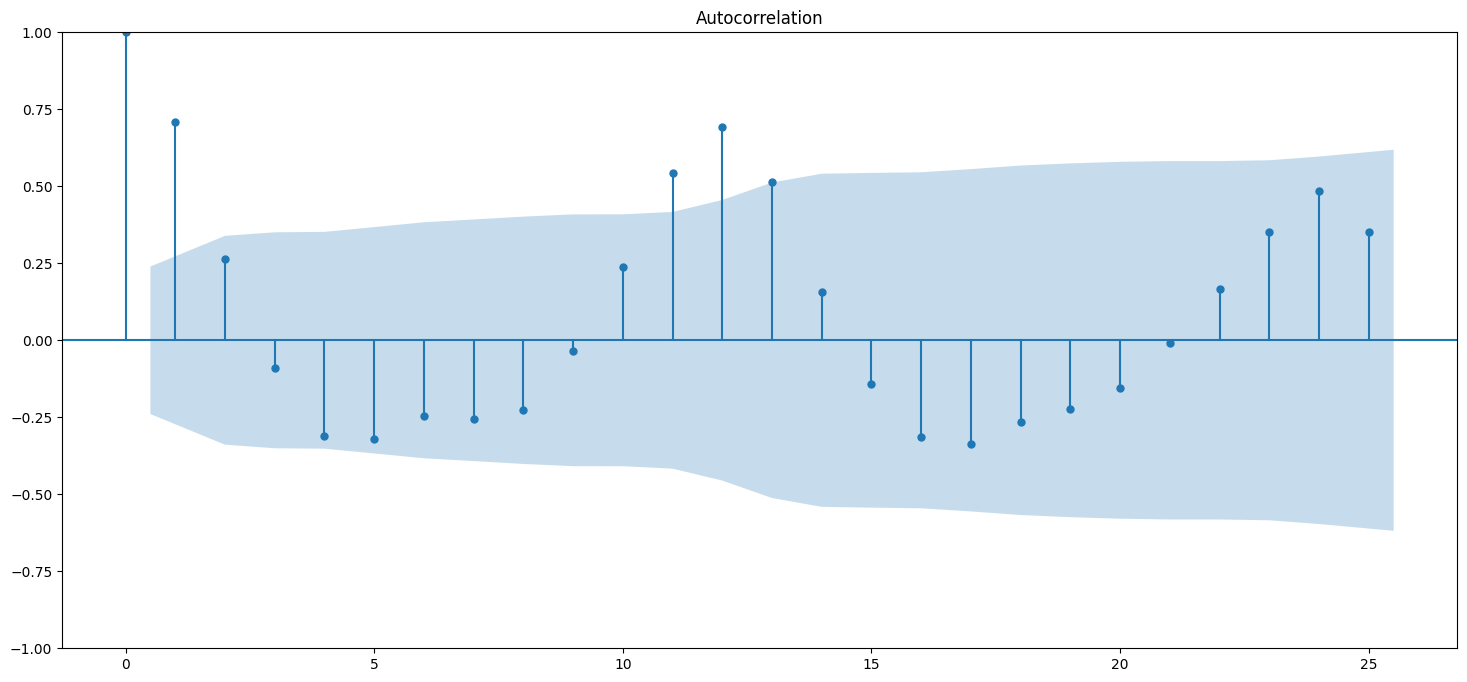

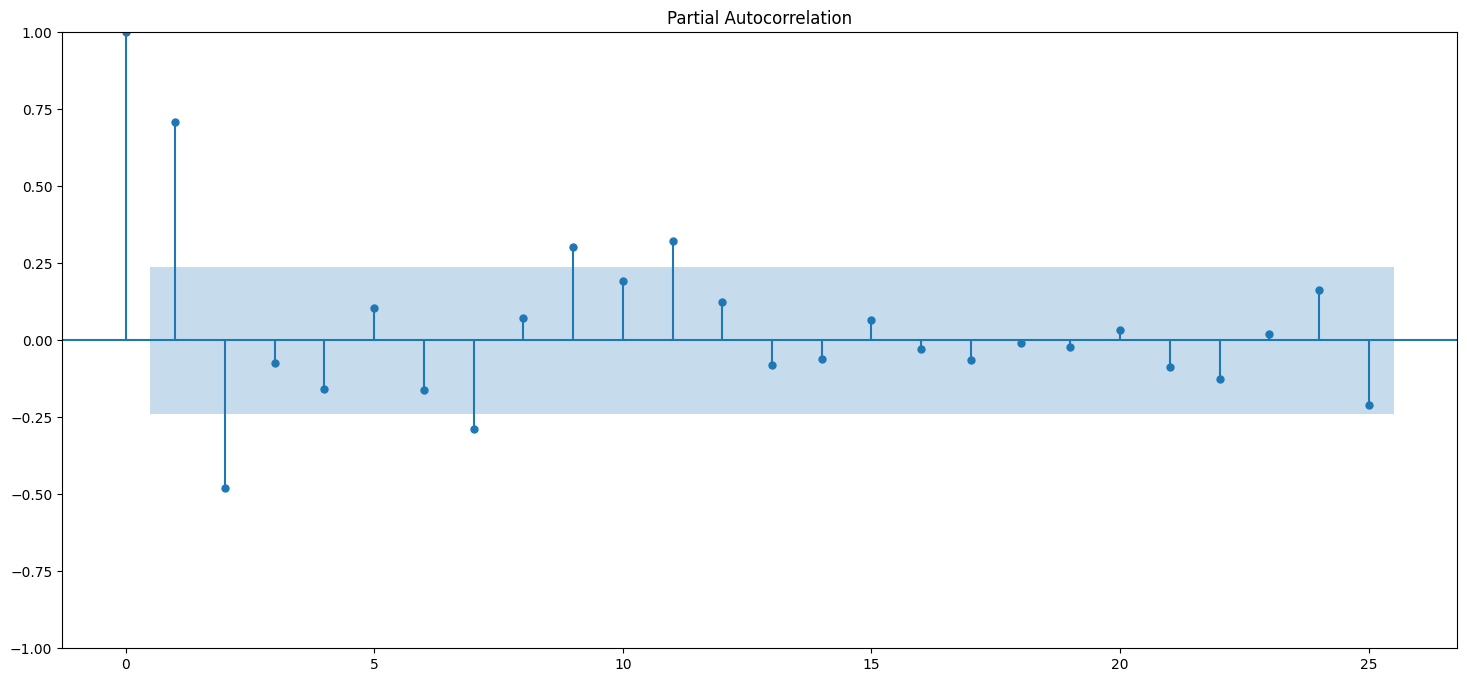

In [133]:
plot_acf(ts_month_avg,lags=25)
plot_pacf(ts_month_avg,lags=25)
plt.show()

In [134]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train,order=(1,1,1), seasonal_order=(1,0,1,12),
                                 enforce_stationarity=False, enforce_invertibility=False,)

In [135]:
fitted = sarima.fit()
print(fitted.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                AQI   No. Observations:                   54
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -202.621
Date:                            Mon, 15 Sep 2025   AIC                            415.243
Time:                                    11:10:20   BIC                            423.561
Sample:                                01-01-2015   HQIC                           418.227
                                     - 06-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4705      0.221      2.126      0.034       0.037       0.904
ma.L1         -1.0000   5060.460   

In [136]:
pred_test = fitted.predict(start=test.index.min(), end=test.index.max())

In [137]:
pred_test

,predicted_mean
2019-07-01,108.937050
2019-08-01,104.261965
2019-09-01,129.514668
2019-10-01,270.469487
2019-11-01,347.573555
2019-12-01,311.647910
2020-01-01,314.989298
2020-02-01,247.692036
2020-03-01,183.130572
2020-04-01,213.222649


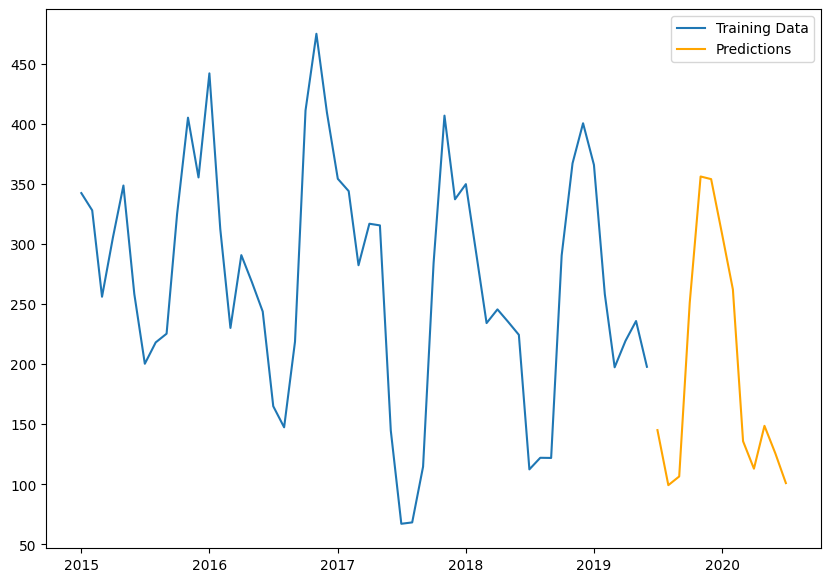

In [138]:
plt.figure(figsize=(10,7))
plt.plot(train.index,train,label='Training Data')
plt.plot(test.index,test, label='Predictions', color='orange')
plt.legend()
plt.show()


In [139]:
ts_month_avg

,AQI
Date,
2015-01-01,342.290323
2015-02-01,327.928571
2015-03-01,256.064516
2015-04-01,305.266667
2015-05-01,348.580645
...,...
2020-03-01,135.838710
2020-04-01,113.000000
2020-05-01,148.645161


In [140]:
pred_future = fitted.get_prediction(start=pd.to_datetime('2020-08-01'),end=pd.to_datetime('2020-11-01') ,dynamic=False)

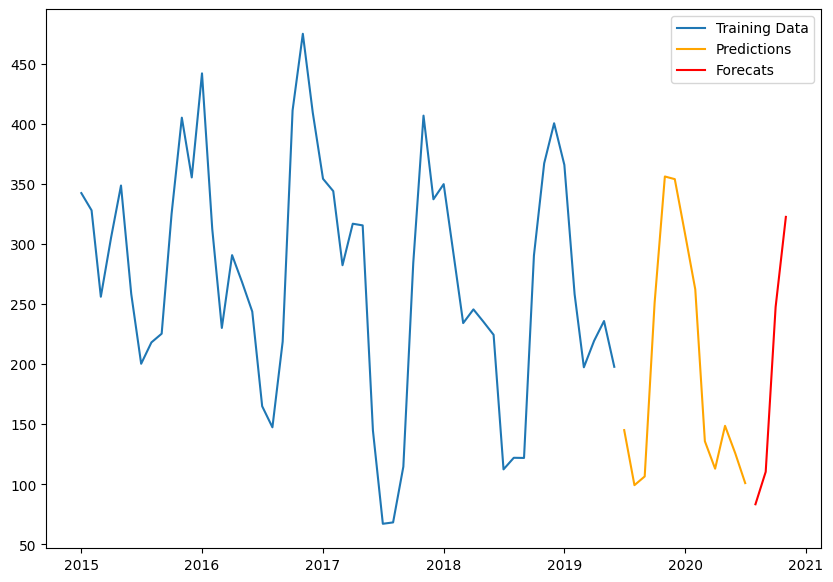

In [141]:
plt.figure(figsize=(10,7))
plt.plot(train.index,train,label='Training Data')
plt.plot(test.index,test, label='Predictions', color='orange')
plt.plot(pred_future.predicted_mean.index,pred_future.predicted_mean.values, label='Forecats', color='red')
plt.legend()
plt.show()


In [142]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(pred_test,test)
print(mae)

32.32085605799797


In [143]:
test.mean()

192.82541570405863

In [144]:
sarima_model = auto_arima(train, start_p=0, start_q=0,
                      max_p=12, max_q=12,
                      m=12,
                      d=None,
                      start_P=1,
                      start_Q=1,
                      max_P=10,
                      max_Q=10,
                      test='adf',         # use adftest to find optimal 'd'
                      D=None,
                      seasonal=True,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=False,
                         information_criterion='aic')

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=649.483, Time=0.01 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=624.295, Time=0.18 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,0)(0,0,3)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,0,0)(0,0,4)[12] intercept   : AIC=inf, Time=2.00 sec
 ARIMA(0,0,0)(0,0,5)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=606.491, Time=0.12 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=613.642, Time=0.19 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,0,0)(1,0,3)[12] intercept   : AIC=inf, Time=0.78 sec
 ARIMA(0,0,0)(1,0,4)[12] intercept   : AIC=inf, Time=1.28 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=606.603, Time=0.28 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(0,0,0)(2,0,3)[12] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(0,0,0)(3,0,0)[12] intercept   : AIC=608.815,

In [145]:
print(sarima_model.summary())


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   54
Model:             SARIMAX(2, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -284.588
Date:                            Mon, 15 Sep 2025   AIC                            581.176
Time:                                    11:11:58   BIC                            593.110
Sample:                                01-01-2015   HQIC                           585.778
                                     - 06-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     23.1077     16.536      1.397      0.162      -9.302      55.517
ar.L1          0.8334      0.172   

In [146]:
auto=SARIMAX(train,order=(1,0,1), seasonal_order=(2,0,0,12),
                                 enforce_stationarity=False, enforce_invertibility=False,)

In [147]:
fitted_2 = auto.fit()


In [148]:
pred_test_new = fitted_2.predict(start=test.index.min(), end=test.index.max())

In [149]:
pred_test_new

,predicted_mean
2019-07-01,108.844337
2019-08-01,92.831281
2019-09-01,109.412738
2019-10-01,253.576461
2019-11-01,344.016637
2019-12-01,316.329256
2020-01-01,311.472632
2020-02-01,242.863455
2020-03-01,192.742841
2020-04-01,206.200302


In [150]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(pred_test_new,test)
print(mae)

30.24855463785459


# Introduction and Decomposing

In [151]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange
from pandas import Series
from matplotlib import pyplot
import matplotlib.pyplot as plt


In [152]:
series = [i+randrange(10) for i in range(1,100)]


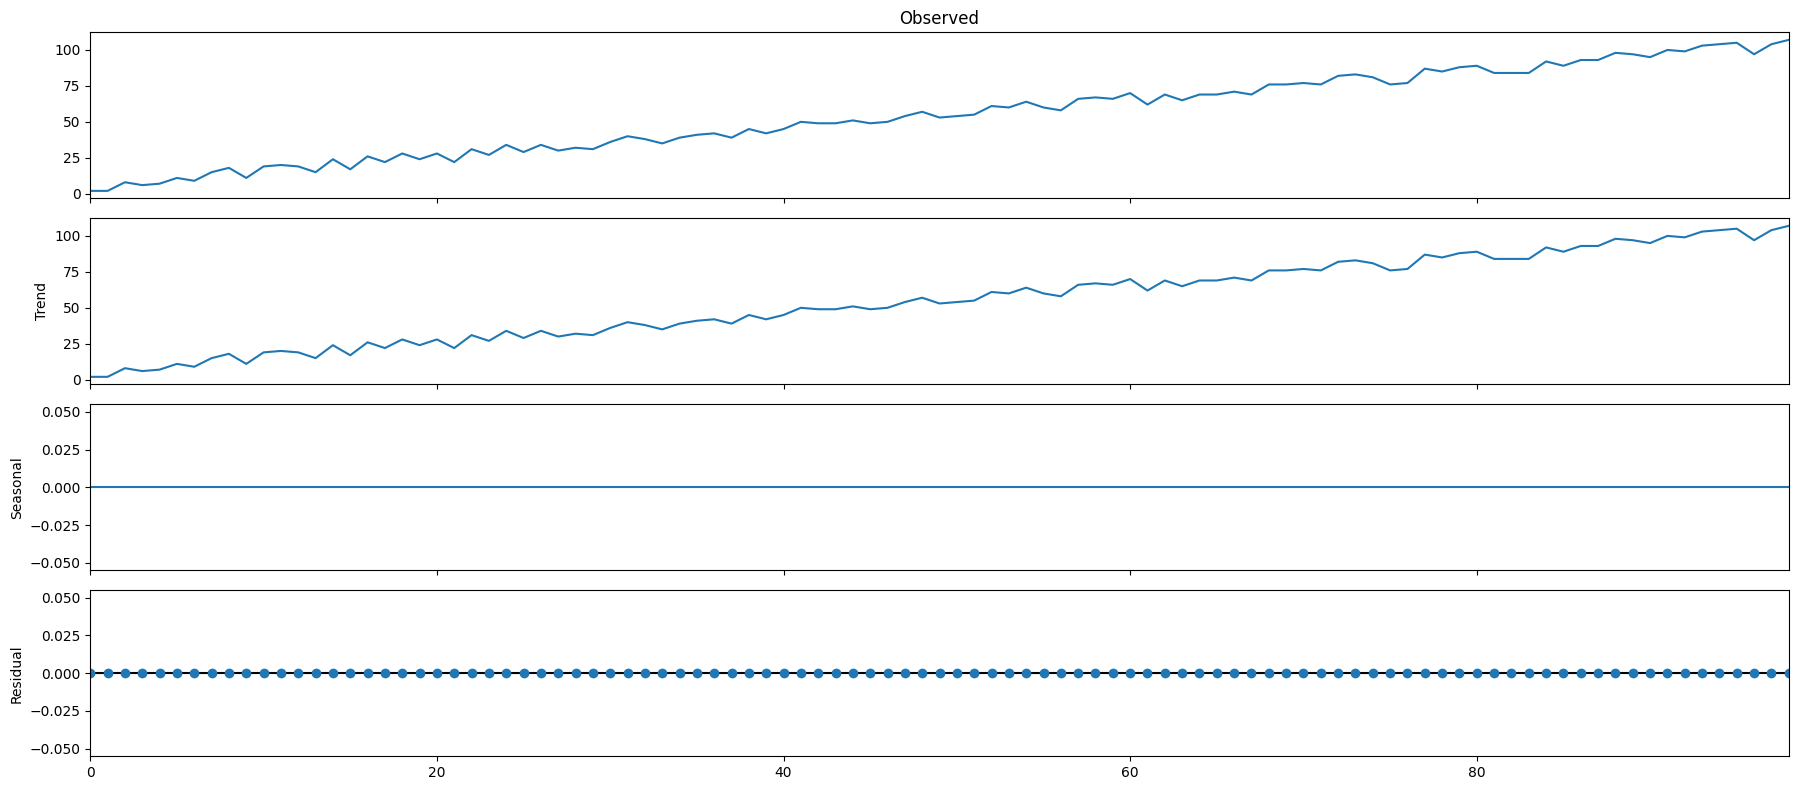

In [153]:
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
pyplot.show()

# Multiplicative

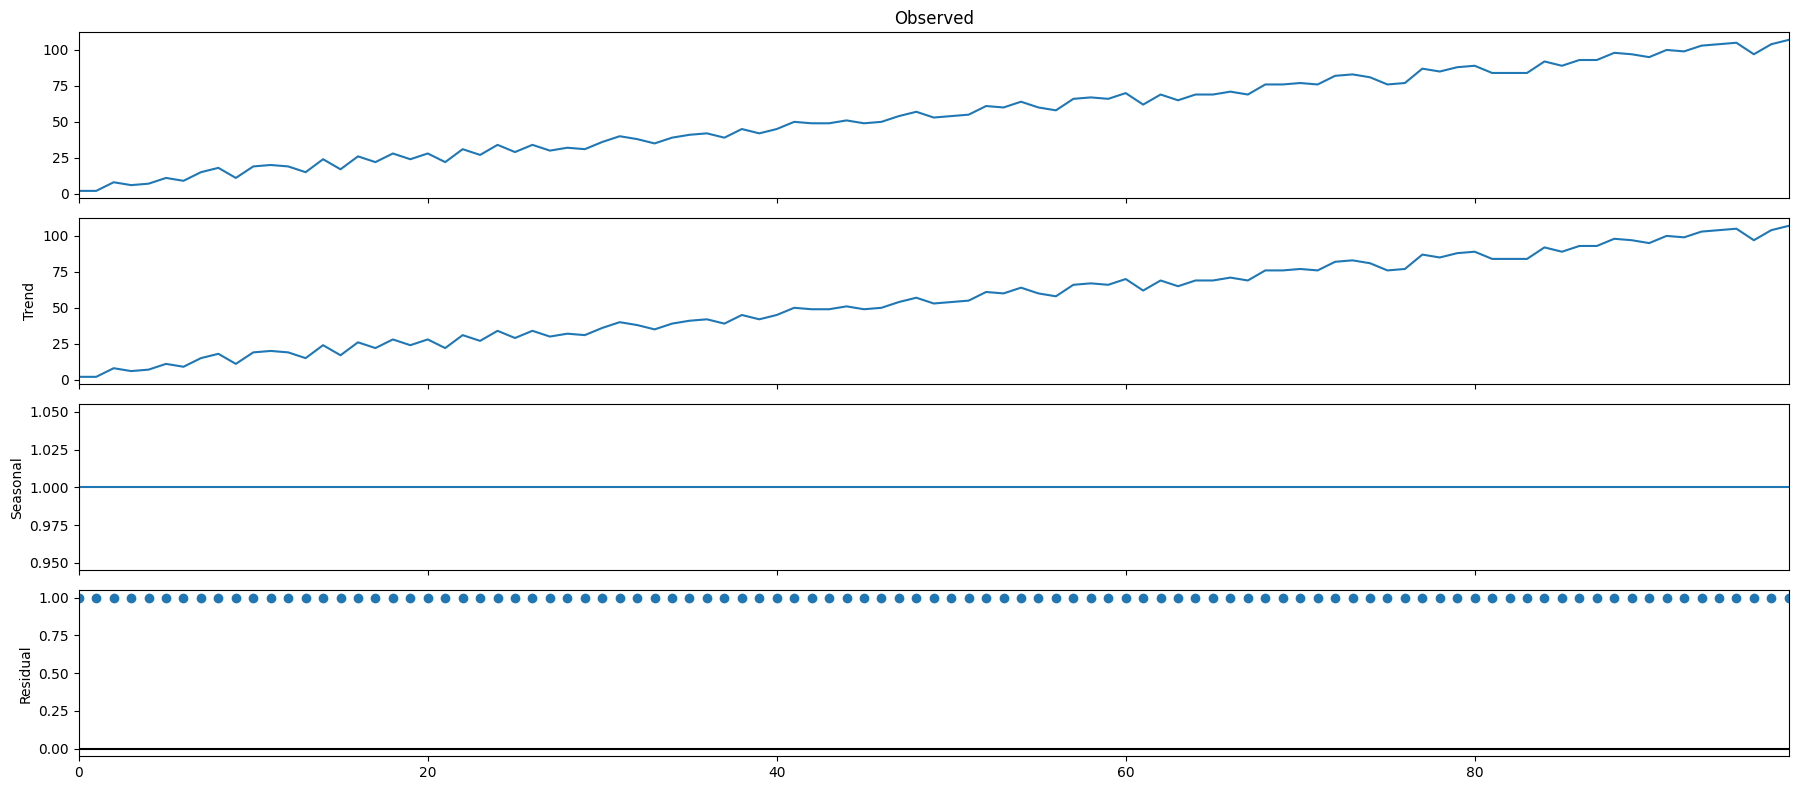

In [154]:
series_2 = [i**2.0 for i in range(1,100)]
result_2 = seasonal_decompose(series, model='multiplicative', period=1)
result_2.plot()
pyplot.show()

# Example

In [155]:
df=pd.read_csv('airline-passengers.csv')

df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<Axes: xlabel='Month'>

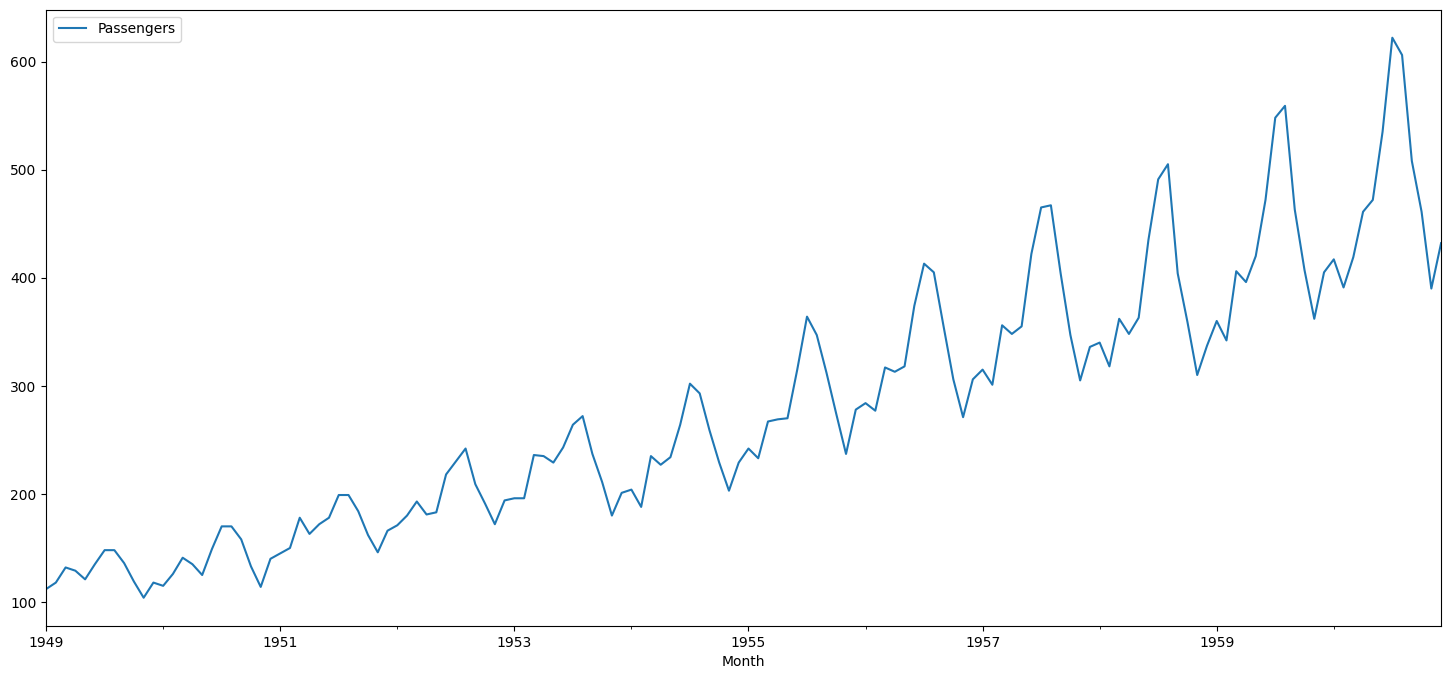

In [156]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)
df.dropna(inplace=True)
df.plot()


In [157]:
result_air=seasonal_decompose(df['Passengers'], model='additive', period=12)

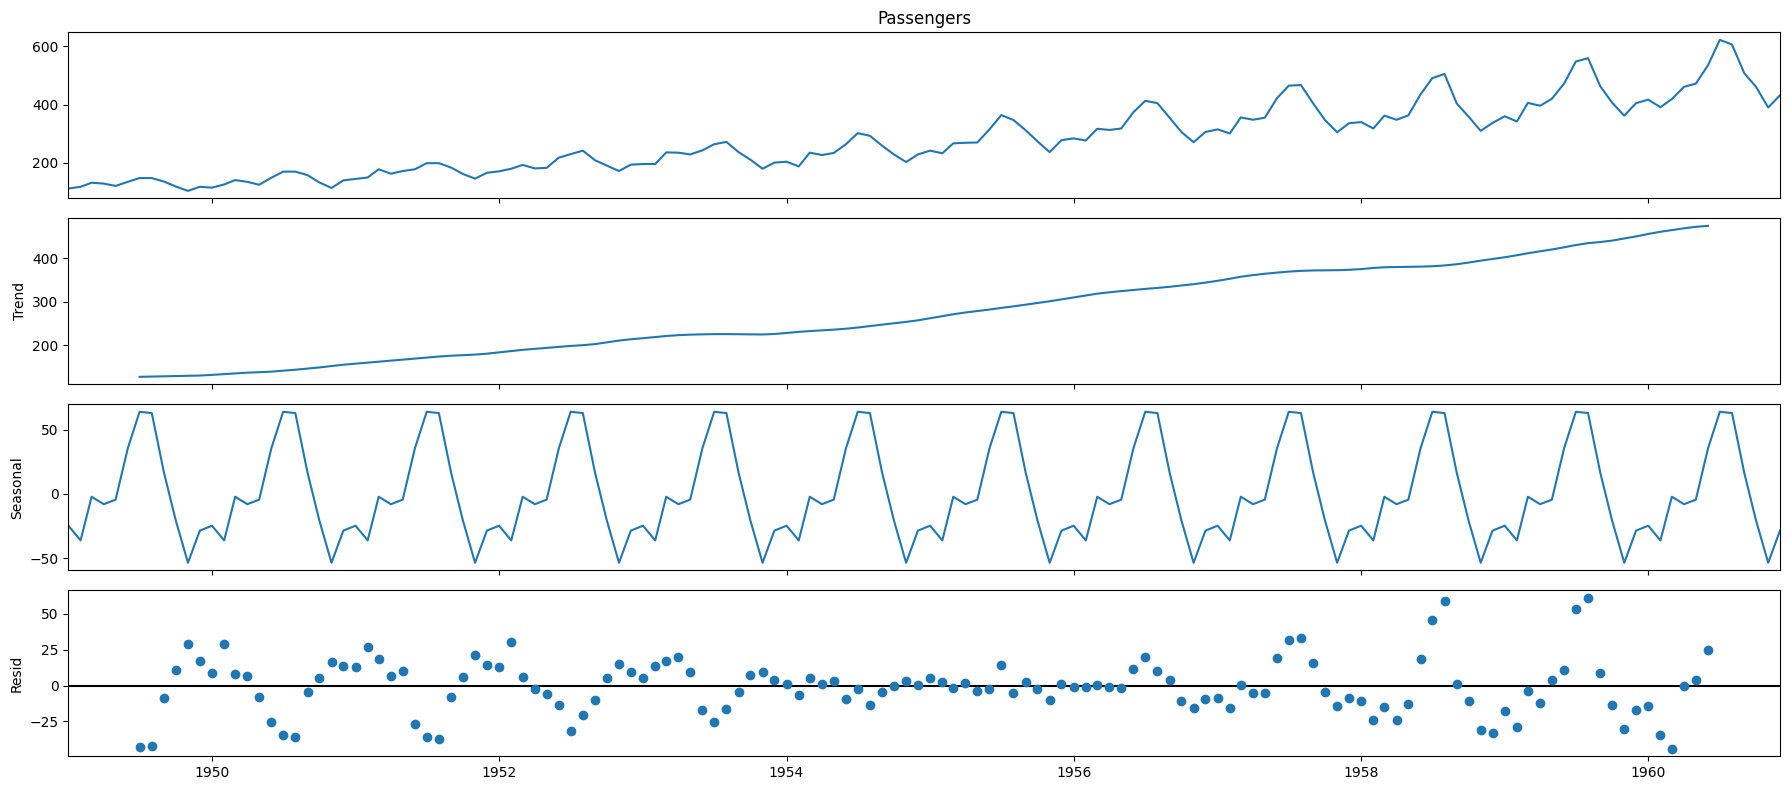

In [158]:
result_air.plot()
pyplot.show()

<Axes: xlabel='Month'>

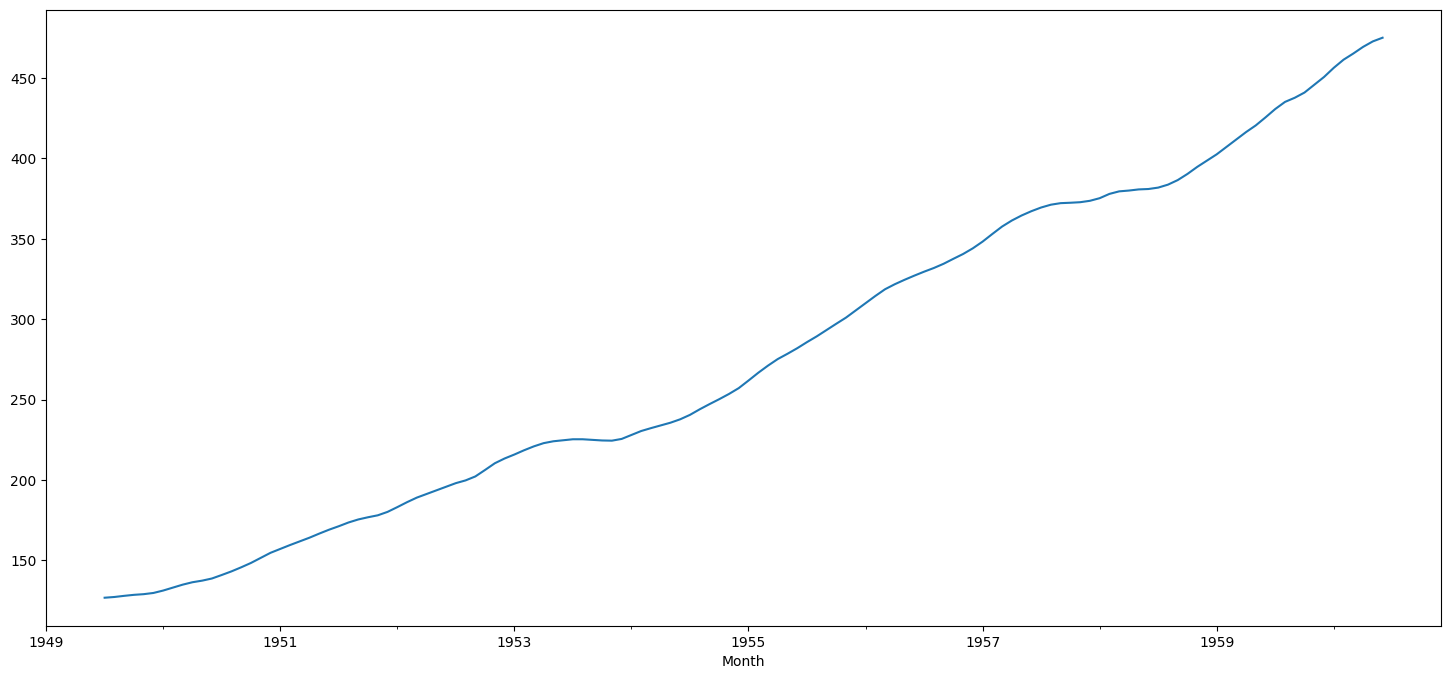

In [159]:
result_air.trend.plot()


<Axes: xlabel='Month'>

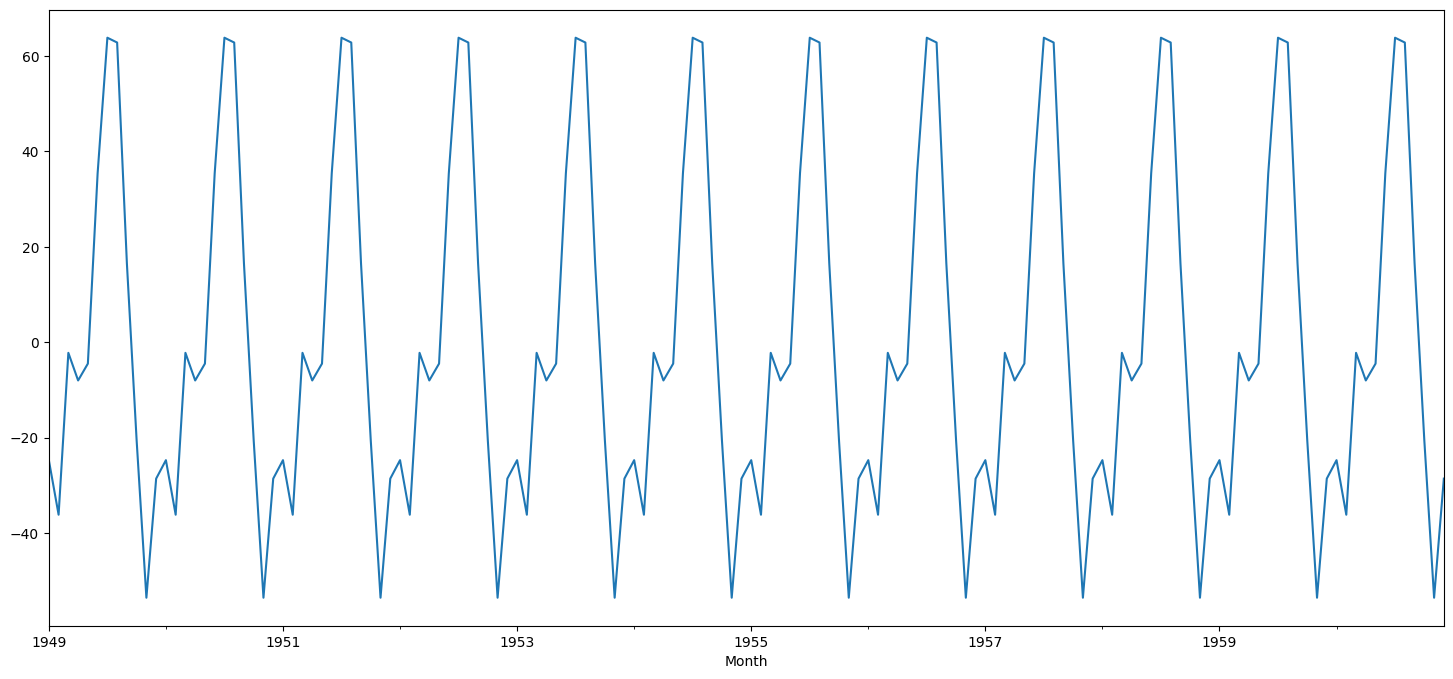

In [160]:
result_air.seasonal.plot()


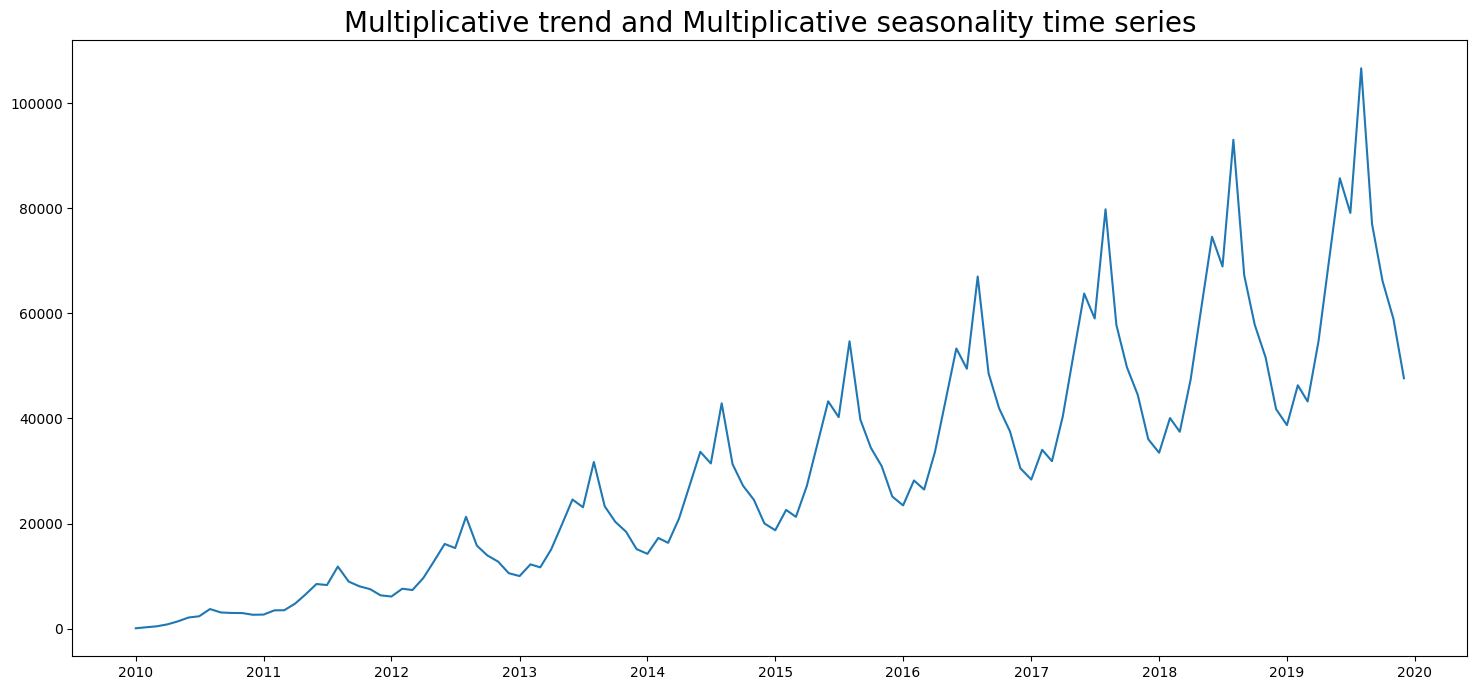

In [161]:
# Single season multiplier factors - for seasonality effect
xs = np.arange(1, 121)
seasonal_multipliers = [110, 130, 120, 150, 190, 230, 210, 280, 200, 170, 150, 120]
# Immitate 10 years of data
x_range = np.arange(1, 121)
# Raise to the 1.25 power to get upwards "curved" trend
x_range = np.array([x**1.25 for x in xs])

time_series = []
# Split to 10 chunks - 1 year each
for chunk in np.split(x_range, 10):
    for i, val in enumerate(chunk):
        # Multiply value with seasonal scalar
        time_series.append(val * seasonal_multipliers[i])

# Convert to DataFrame
df_mm = pd.DataFrame(
    data={'y': time_series},
    index=pd.date_range(start='2010-01-01', freq='MS', periods=120)
)

# Plot
plt.title('Multiplicative trend and Multiplicative seasonality time series', size=20)
plt.plot(df_mm);

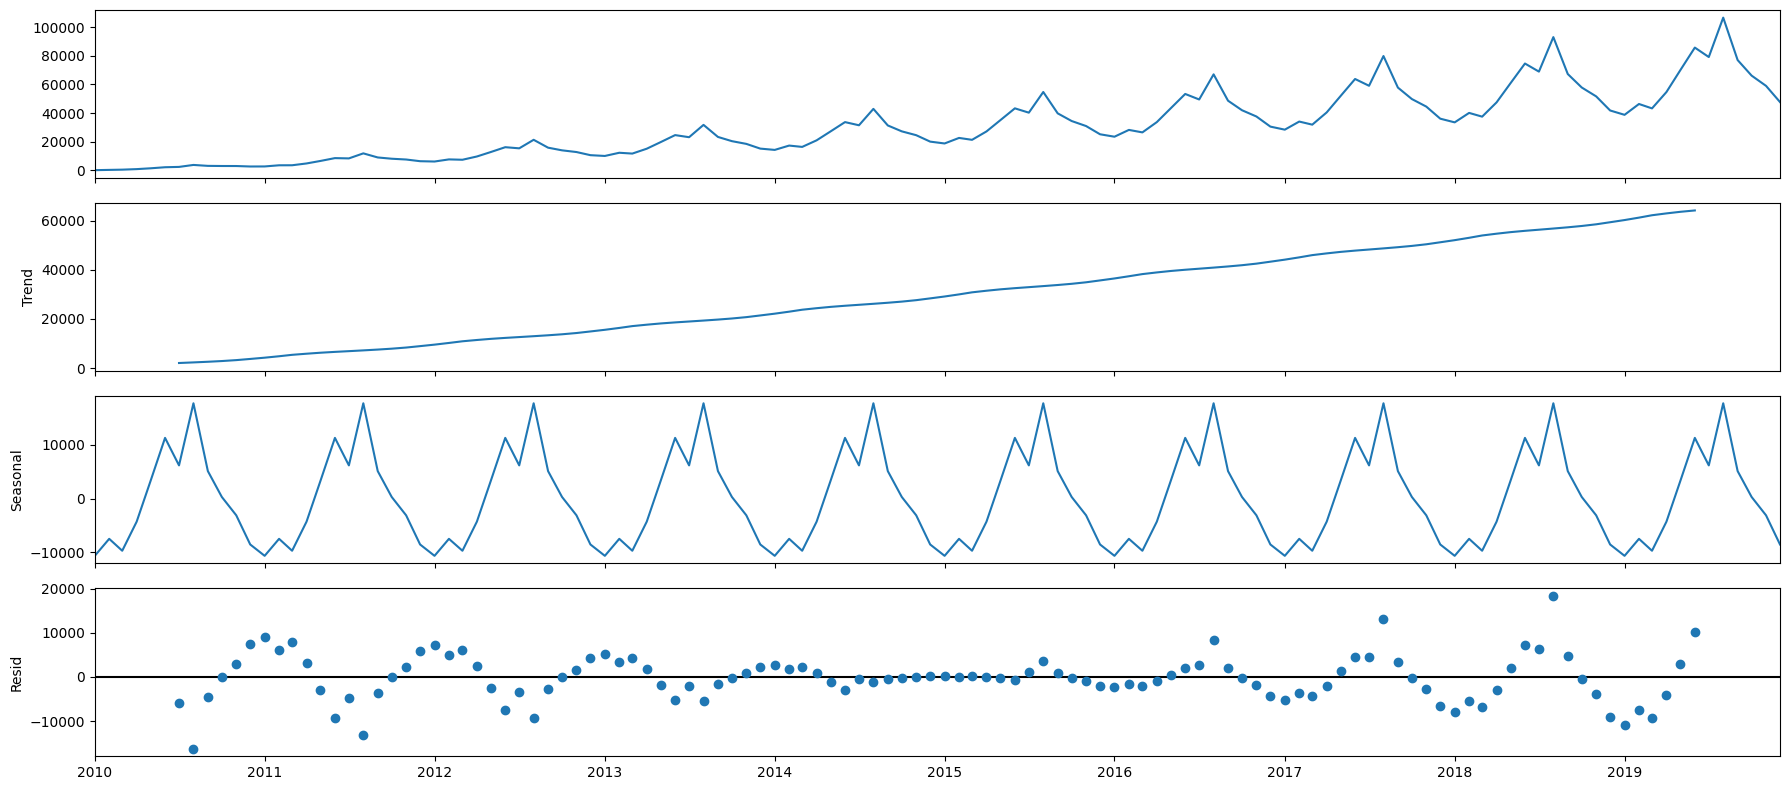

In [162]:
decomposed = seasonal_decompose(df_mm, model='additive')
decomposed.plot();


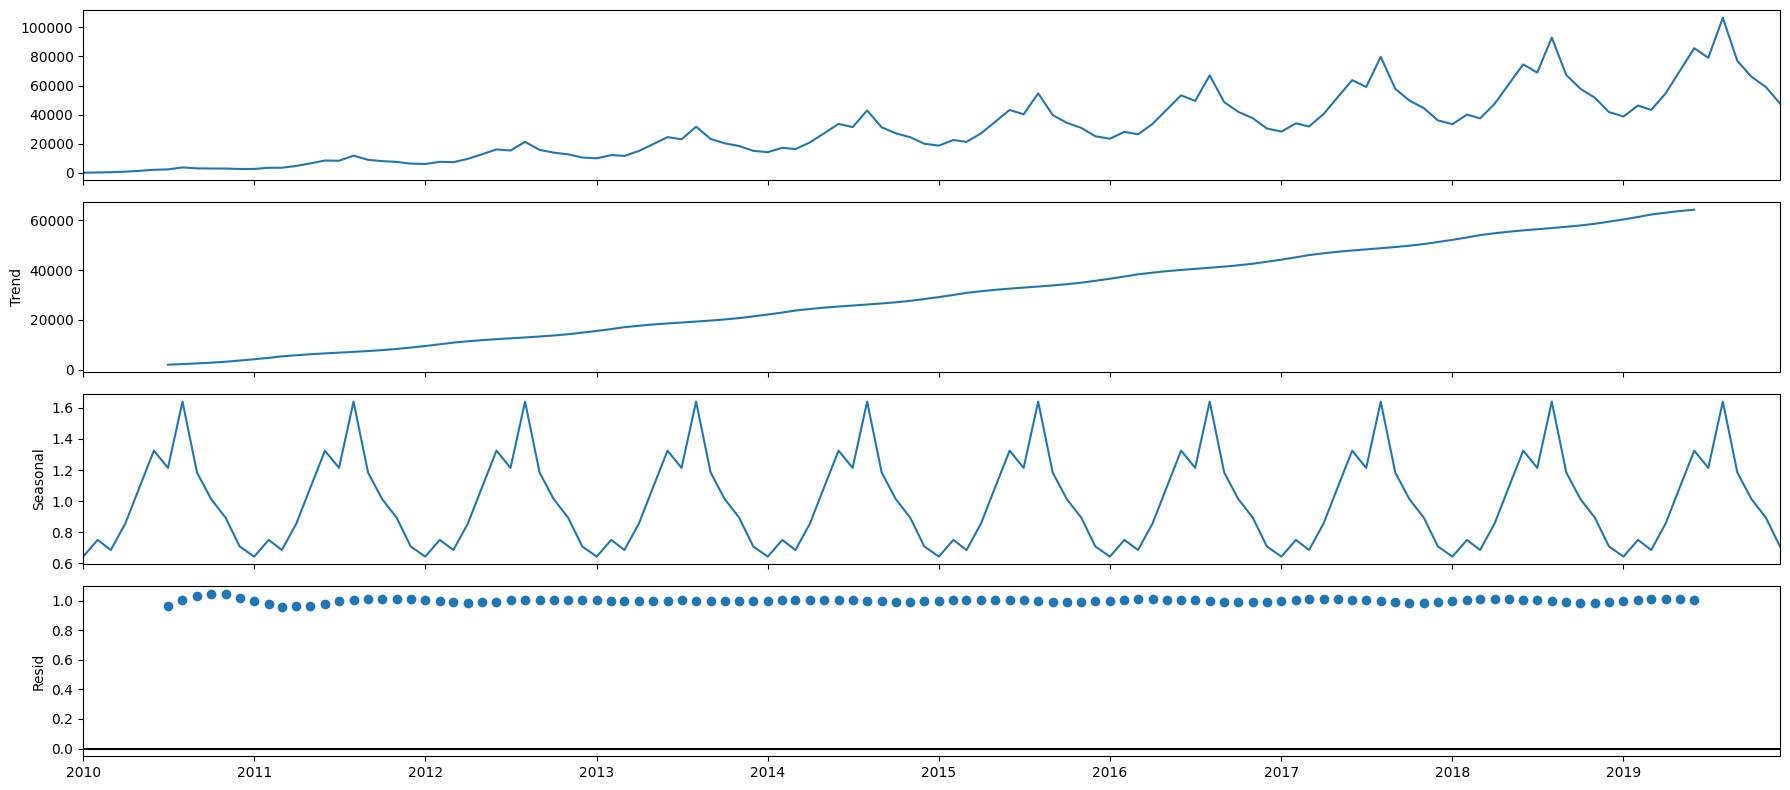

In [163]:
decomposed = seasonal_decompose(df_mm, model='multiplicative')
decomposed.plot();

# Stationary Example

In [164]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from pandas import Series
import numpy as np
from pandas import read_csv

In [166]:
series = pd.read_csv('daily-total-female-births.csv',header=0, index_col=0)

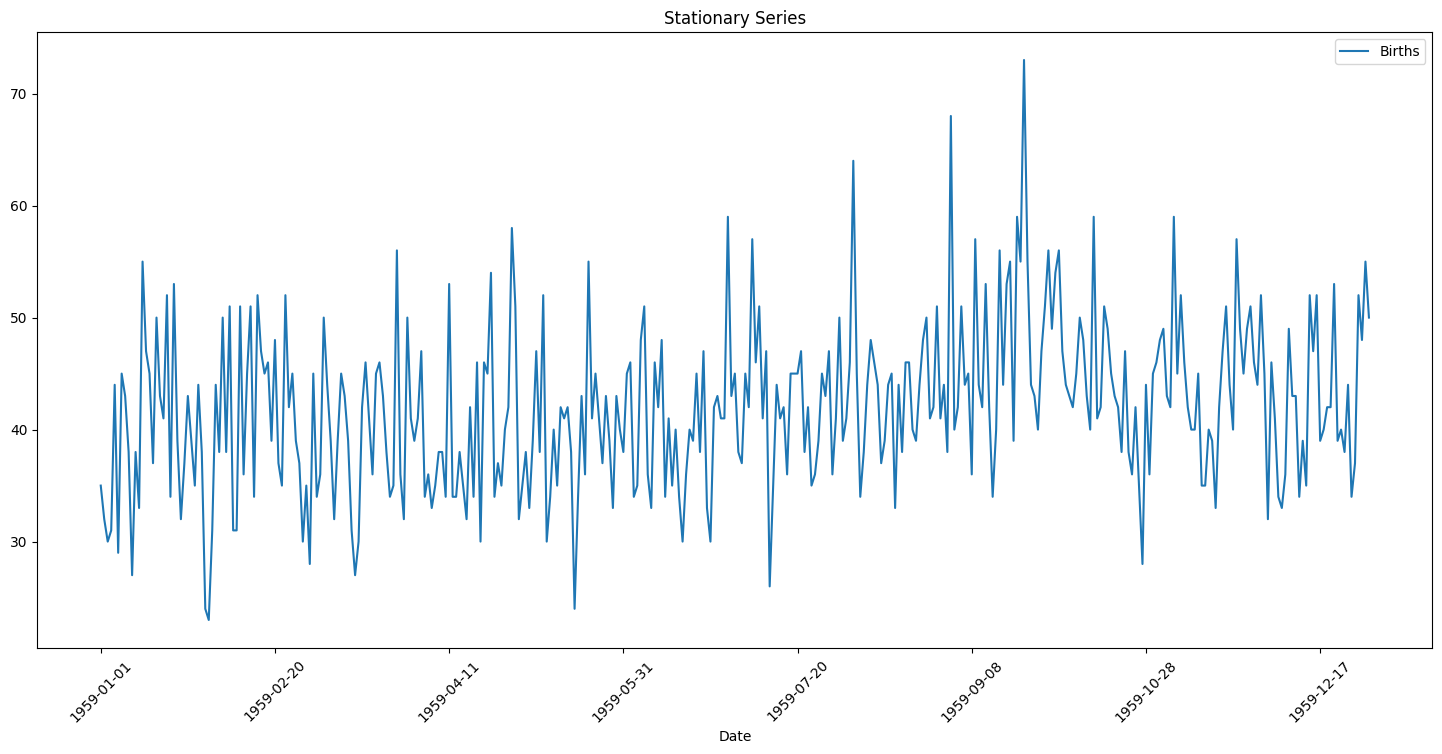

In [167]:
series.plot()
plt.title('Stationary Series')
plt.xticks(rotation = 45)
plt.show()

In [168]:
X = series.values

In [169]:
result = adfuller(X)

In [170]:
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Non Stationary Series

In [172]:
series_2 = pd.read_csv('airline-passengers.csv',header=0, index_col=0)

In [173]:
X_2 = series_2.values

In [174]:
result_2 = adfuller(X_2)

In [175]:
print('ADF Statistic: %f' % result_2[0])
print('p-value: %f' % result_2[1])
print('Critical Values:')
for key, value in result_2[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


# Differencing

<Axes: xlabel='Month'>

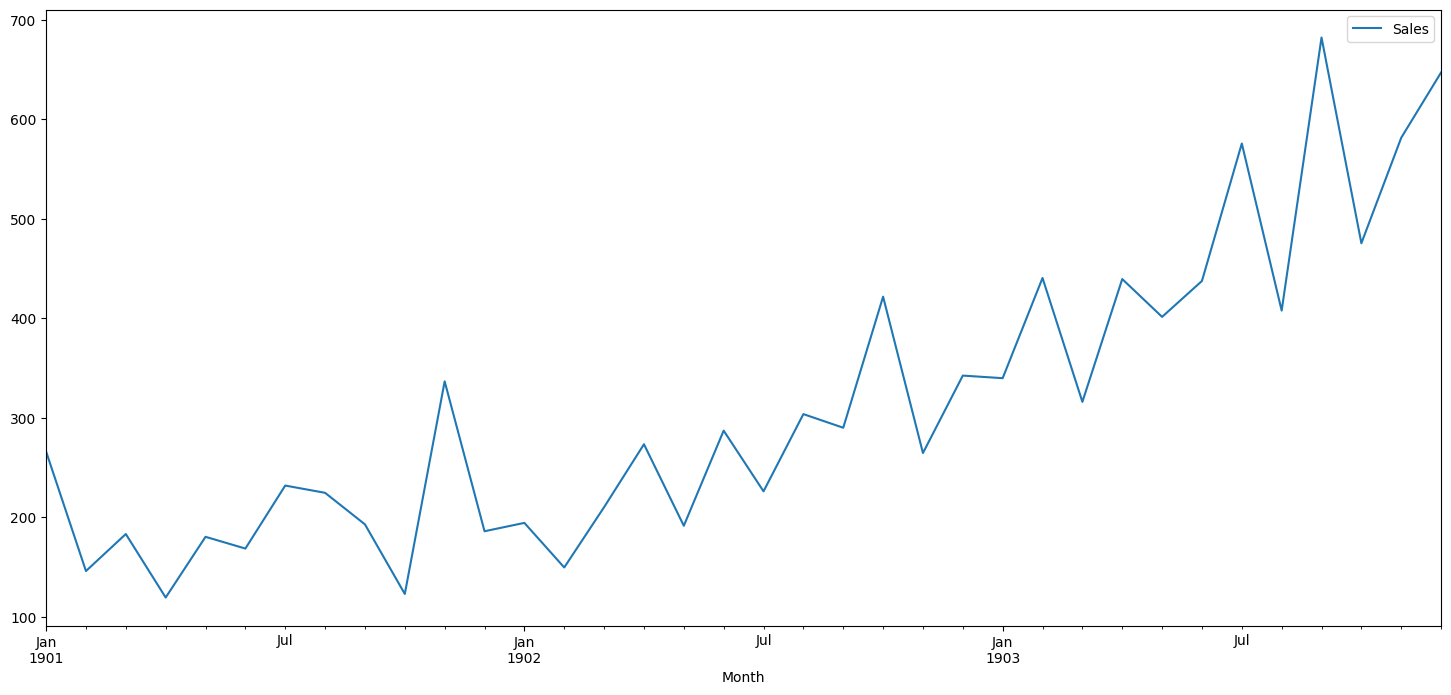

In [177]:
from datetime import datetime
dateparse = lambda x: datetime.strptime('190'+x, '%Y-%m')
series_3 = read_csv('shampoo_sales.csv', parse_dates=[0], header=0, index_col=0, date_parser=dateparse)
series_3.plot()

In [178]:
X_3=series_3.values

In [179]:
def difference(dataset, interval=1):
 diff = list()
 for i in range(interval, len(dataset)):
     value = dataset[i] - dataset[i - interval]
     diff.append(value)
 return Series(diff)

In [180]:
diff=difference(X_3)

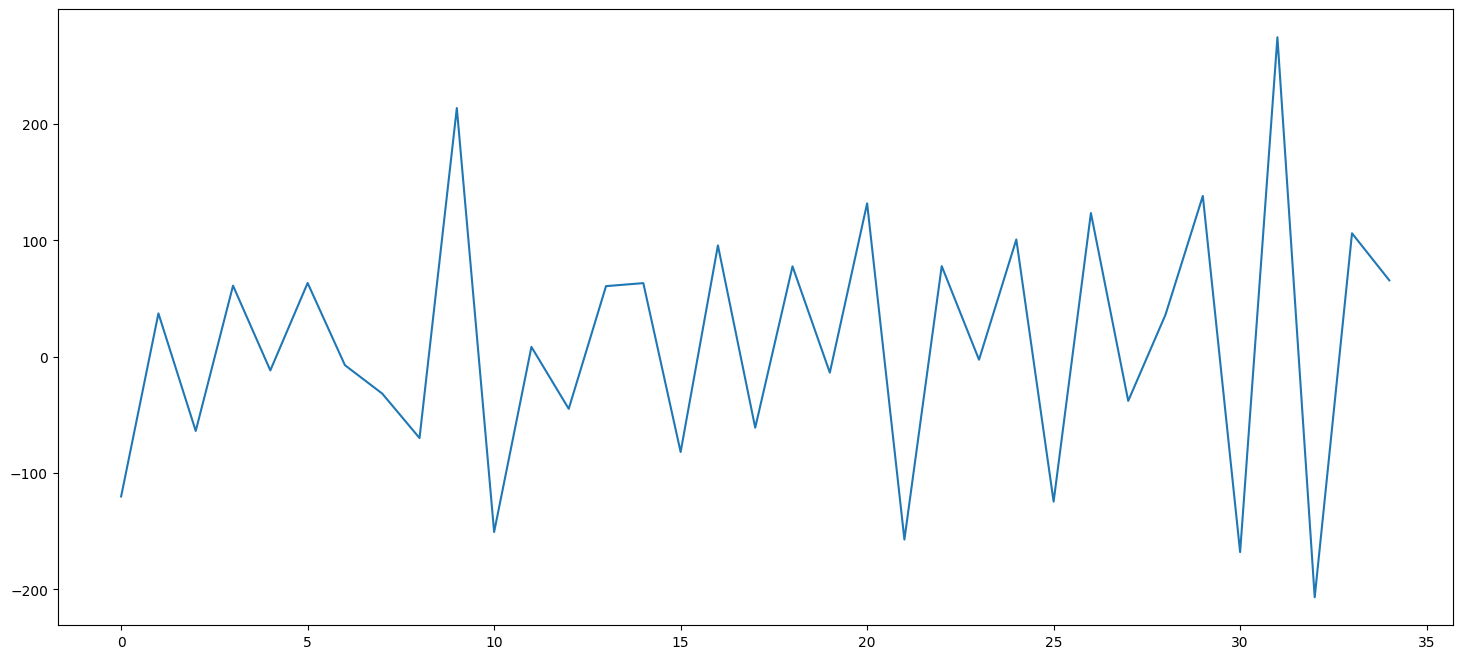

In [181]:
plt.plot(diff)

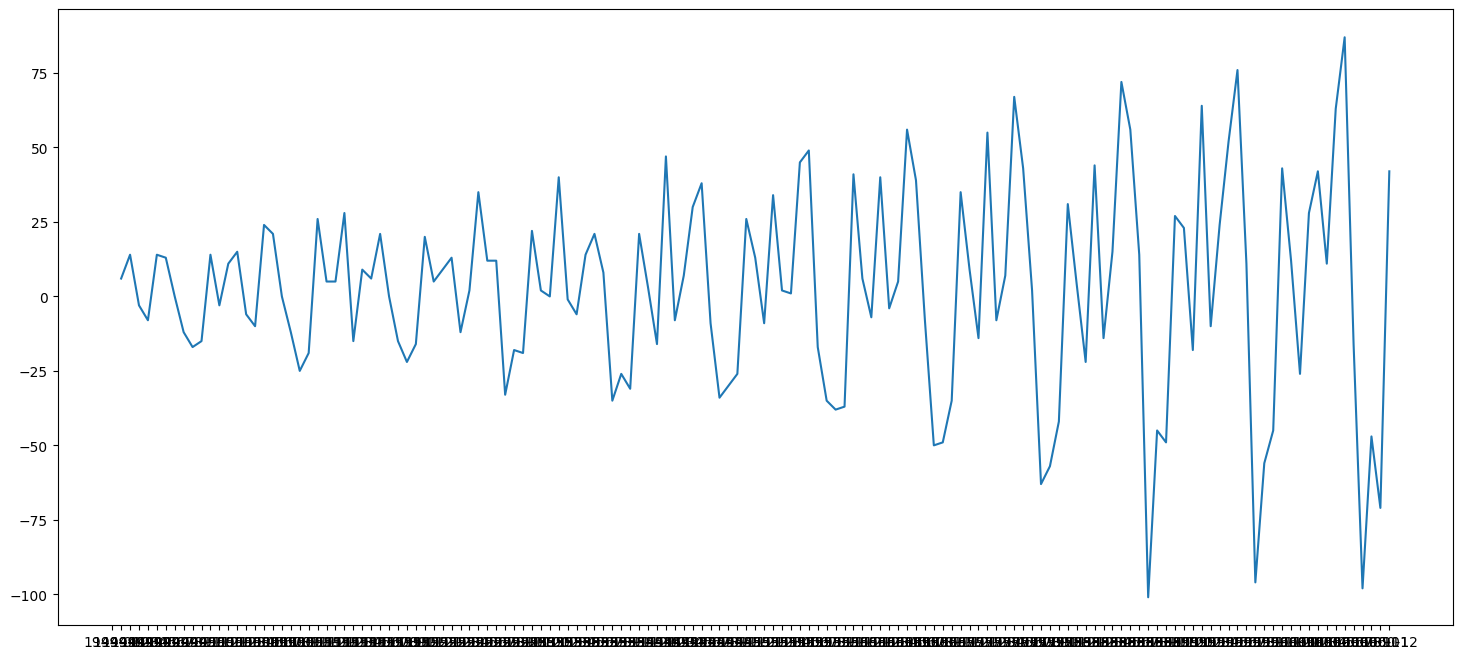

In [182]:
diff_2 = series_2.diff()
plt.plot(diff_2)
plt.show()

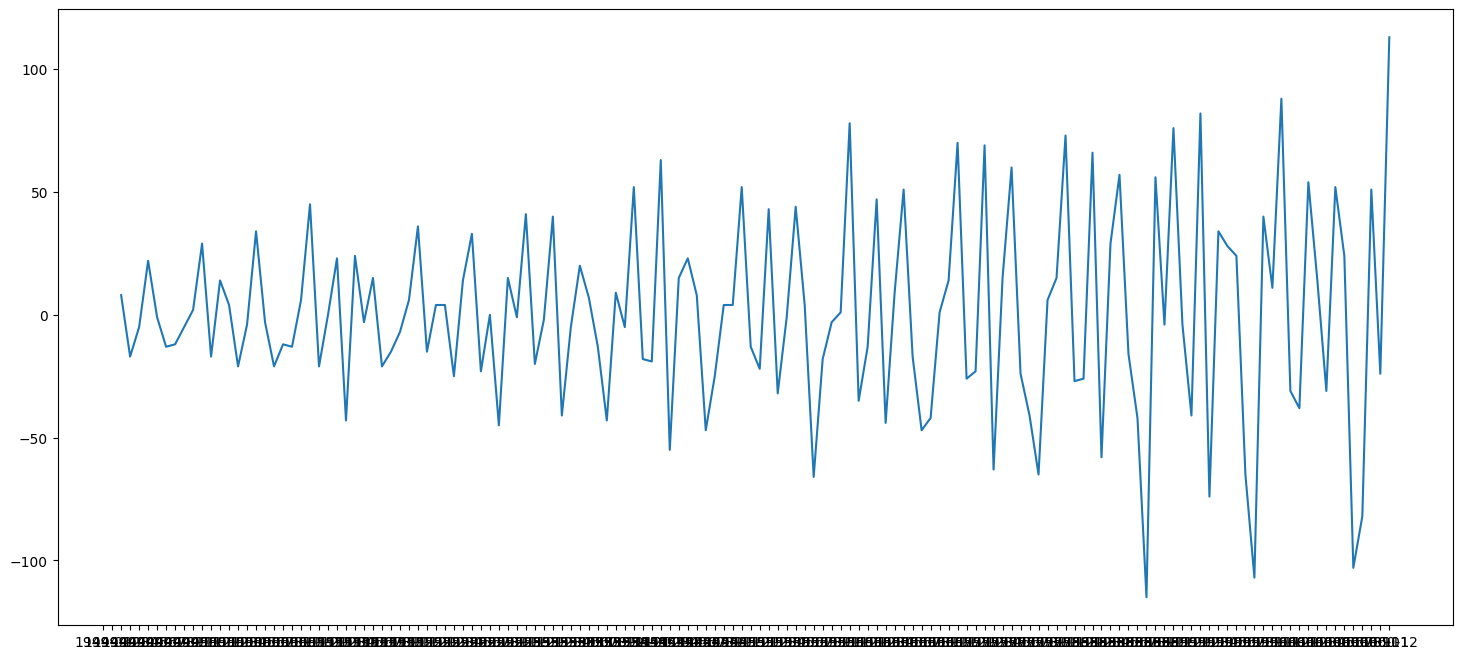

In [183]:
diff_2 = series_2.diff().diff()
plt.plot(diff_2)
plt.show()